<a href="https://colab.research.google.com/github/zagnouneotmane/British-Airways-Data-Science-Virtual-Experience-Programme/blob/main/customer_prediction_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting customer buying behaviour

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
pd.set_option('display.max_row', 14)
pd.set_option('display.max_column', 14)

In [4]:
data = pd.read_csv('/content/customer_booking.csv', encoding = "ISO-8859-1")

In [5]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [8]:
df = data.copy()

## EDA

**Objectif :**
*  Understand our data as well as possible
*  Develop an initial modeling strategy
*  some basic statistics

**Basic checklist**

*Shape Analysis :*
*   **variable target :** booking_complete
*   **rows & columns :** (50000, 14)
*   **variable types :** qualitatives : 13, quantitatives : 1
*   **Analysis of missing values :** no missing values

*Background Analysis :*
*   **Visualization of the target :**
 *  15% of customer completed the booking (7478 / 42522)
*   **Meaning of variables :**

 *  variables continues non standardisées, skewed (asymétriques).
 *  variable qualitative : Almost binaire (0, 1), Higher Percentage of round trips, Internet, wants_extra_baggage, Asia-Pacific region and destination flight route (AKLKUL, PENTPE, MELSGN, ICNSIN, DMKKIX), Same percentage for flight departure days.
*   **Relation Variables / Target :**
 *  in all variables the rate of completed reservation lower than the rate of reservation not completed except wants_extra_baggage.
 *  target / Flight duration  : this hours (8.83, 8.58, 6.62, 7.00) are more completed the booking.
 *  target / Purchase lead time & Length of stay & number of passengers : decrease strictly of the rate of completed the booking (not completed the booking).  
 *  target / Flight hour : a high percentage(5%) of completed the booking when the number of flight hours between 1 and 15.
 *  target / num_passengers & sales_channel : almost
 passengers between 6 and 9 are completed the booking with Mobile.
 *  target / num_passengers & type_trip : almost
 passengers that chose OnWay and CircleTrip are completed the booking.
 *  target / num_passengers & wants_in_flight_meals : less almost passengers that don't want in flight meals are completed the booking.

 *  target / route	 : most rated destination flight route (BKIKTM, AKLPEK, PVGSGN, ICNSDK) of completed the booking.
 *   target / booking_origin : most rated country from where booking was made (Kazakhstan, Bahrain,	Romania) of completed the booking.

*Analyse plus détaillée*
*   **Relation Variables / Variables :**

 *   Any correlated variables
 *   num_passengers / colm_D_H : flight_duration have some difference in distribution of completed the booking, doing same features engineering later

* **hypotheses nulle (H0):**
The clients is completed the booking have significativement différents for `num_passengers`
`purchase_lead`
`length_of_stay`
`flight_duration`
and `wants_extra_baggage`
`wants_preferred_seat`
`wants_in_flight_meals` have significant association with completed booking

### Shape Analysis

In [7]:
df.shape

(50000, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [9]:
df.dtypes.value_counts()

int64      8
object     5
float64    1
dtype: int64

<Axes: >

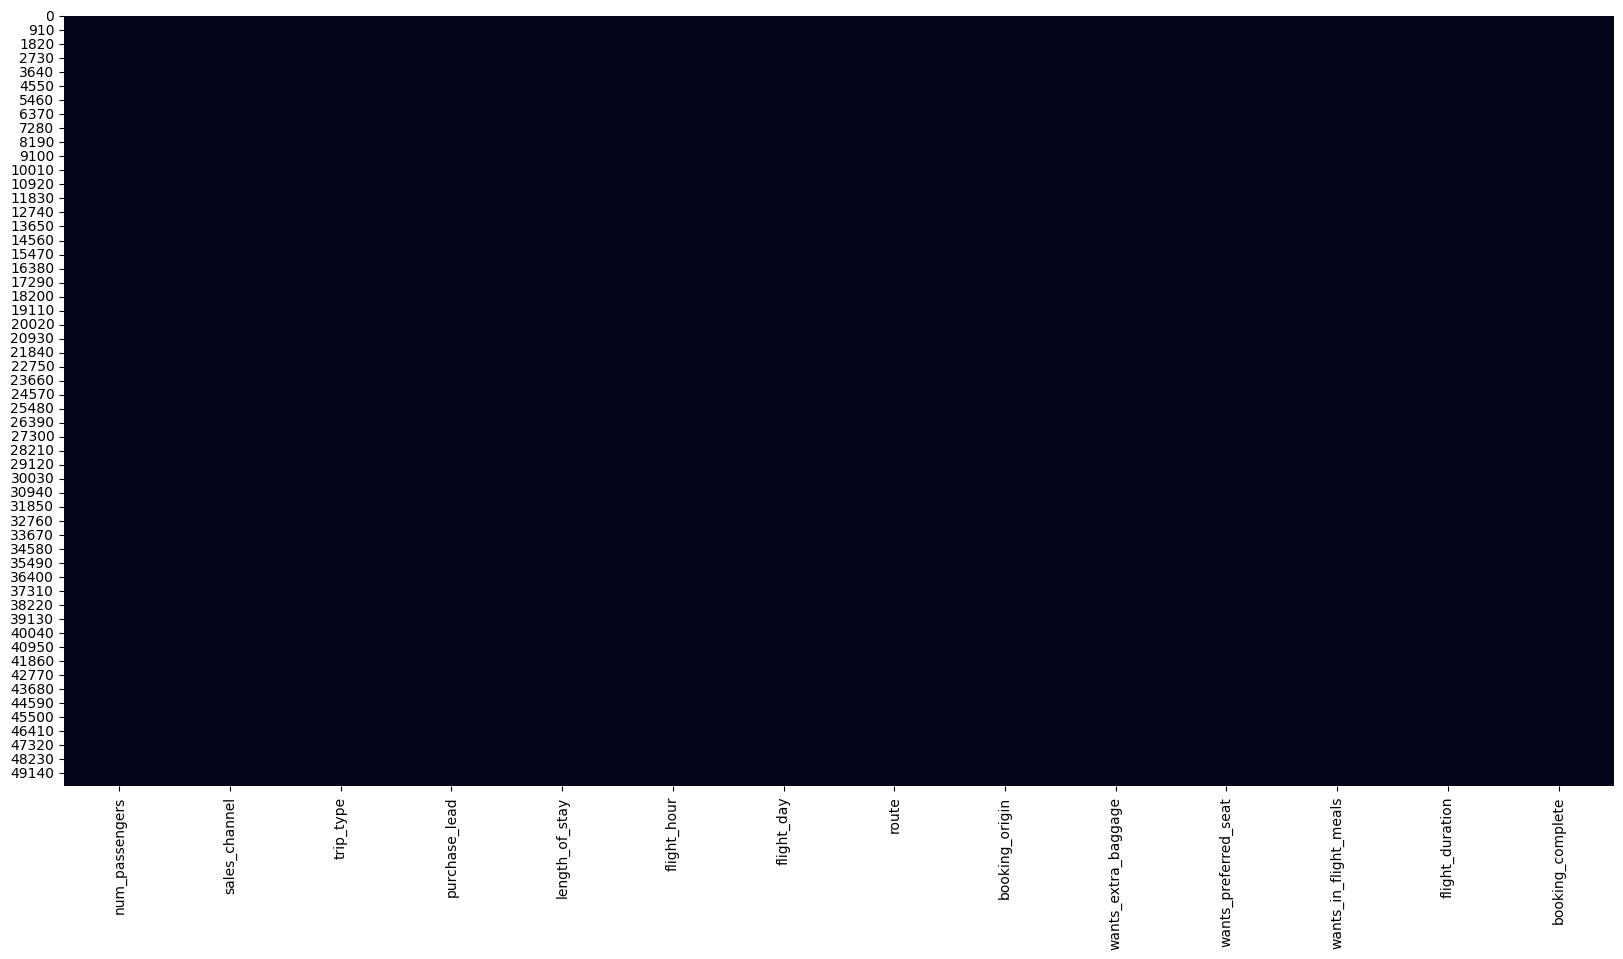

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [74]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


### Background Analysis

 The target

In [79]:
df['booking_complete'].value_counts()

2

In [12]:
df['booking_complete'].value_counts(normalize=True)

0    0.85044
1    0.14956
Name: booking_complete, dtype: float64

Histogram of continuous variable

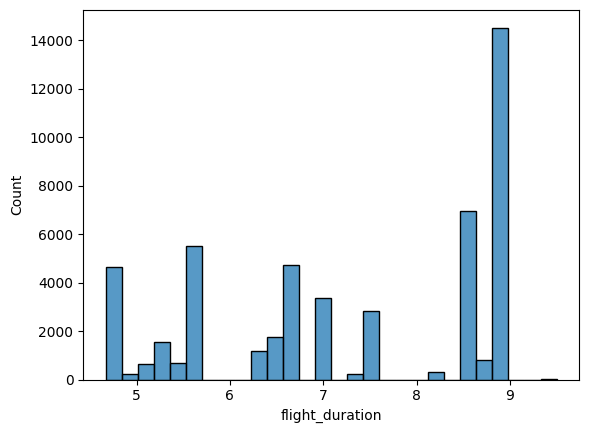

In [13]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.histplot(df[col])

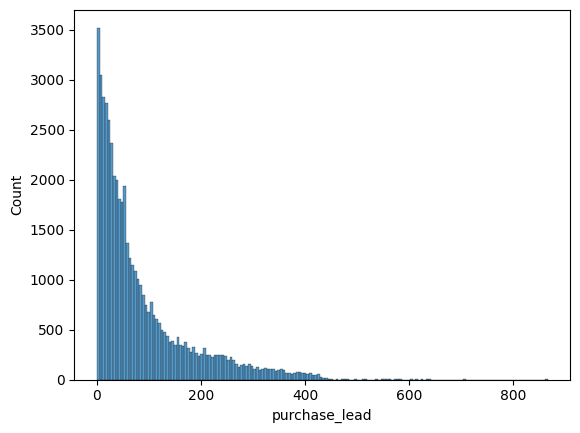

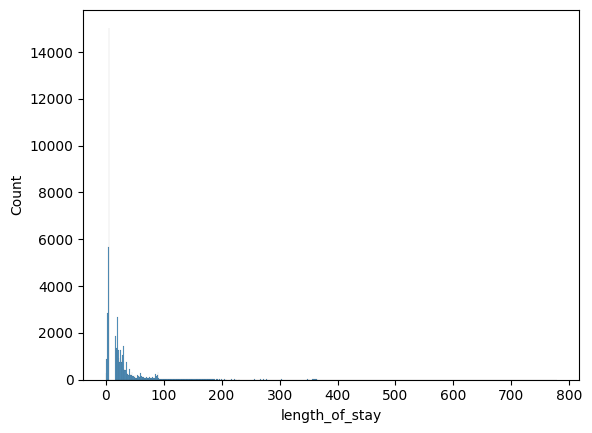

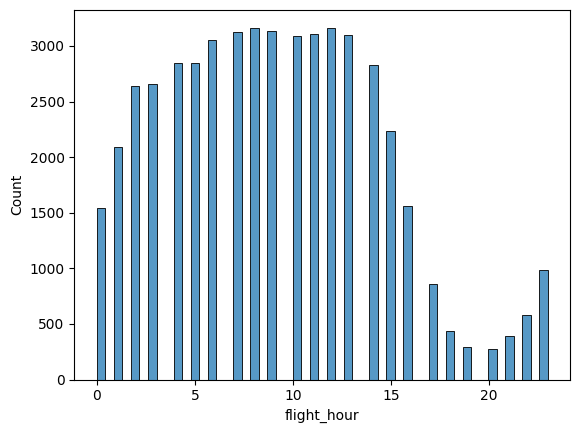

In [14]:
for col in df.select_dtypes('int'):
    if len(df[col].unique()) > 9 :
      plt.figure()
      sns.histplot(df[col])

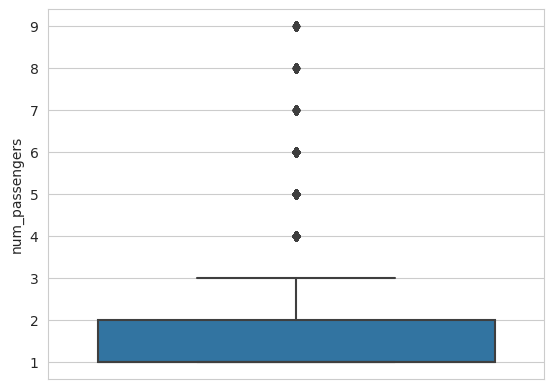

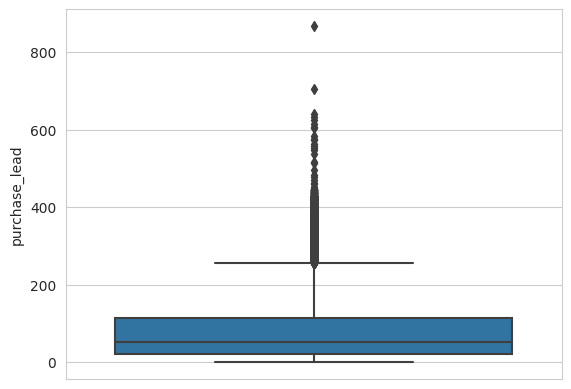

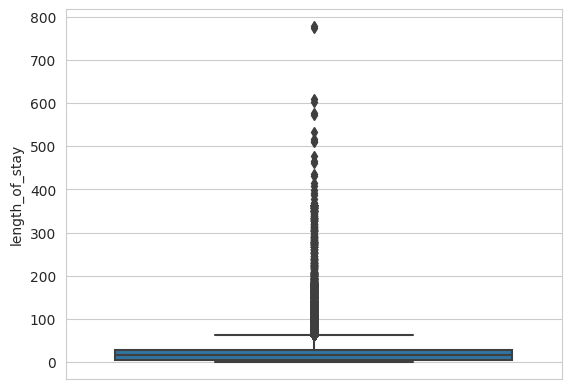

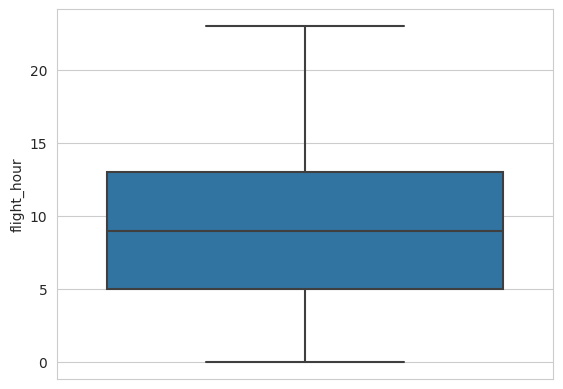

In [81]:

for col in df.select_dtypes('int'):
    if len(df[col].value_counts())>2:
      plt.figure()
      sns.boxplot(data=df, y=col)

Qualitatives Variables / Categorical Variables

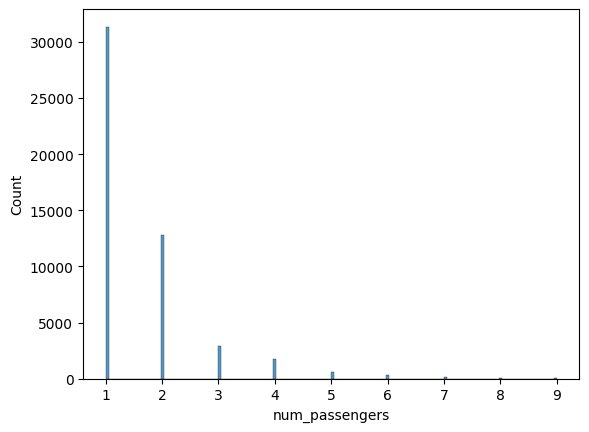

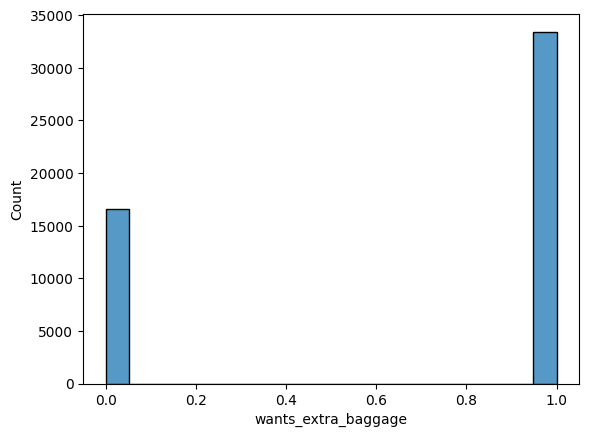

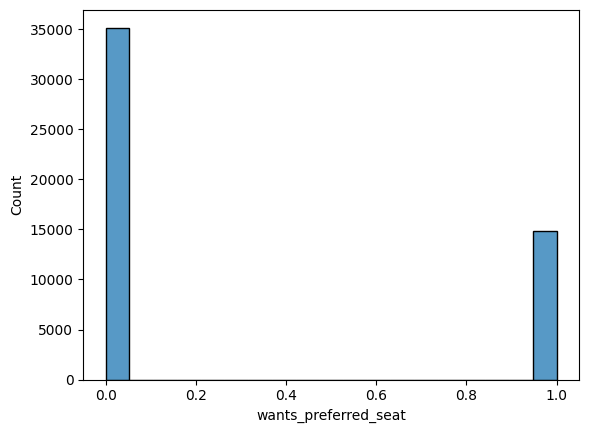

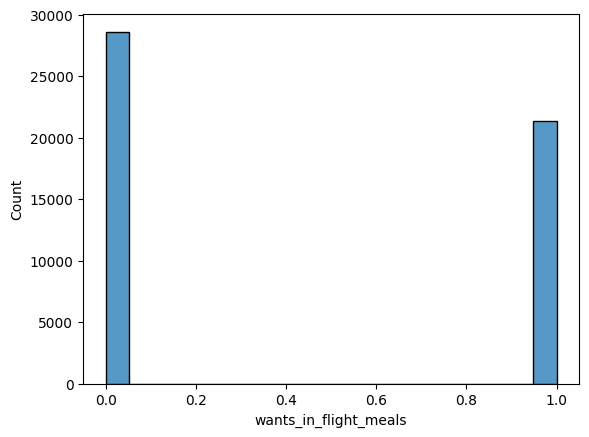

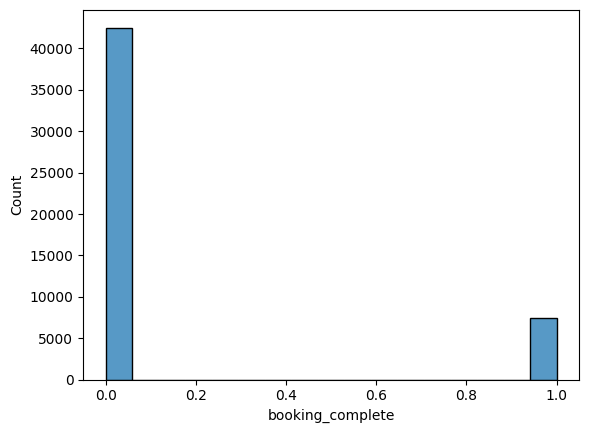

In [15]:
for col in df.select_dtypes('int'):
    if len(df[col].unique()) <=9 :
      plt.figure()
      sns.histplot(df[col])

In [16]:
for col in df.select_dtypes('object'):
    print(f'{col :-<20} {df[col].unique()}')

sales_channel------- ['Internet' 'Mobile']
trip_type----------- ['RoundTrip' 'CircleTrip' 'OneWay']
flight_day---------- ['Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Tue' 'Fri']
route--------------- ['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'BWNTPE' 'CANDEL' 'CANIKA' 'CANMEL' 'CANMRU' 'CANOOL' 'CANPER' 'CANSYD'
 'CCUMEL' 'CCUMRU' 'CCUOOL' 'CCUPER' 'CCUSYD' 'CCUTPE' 'CEBMEL' 'CEBOOL'
 'CEBPER' '

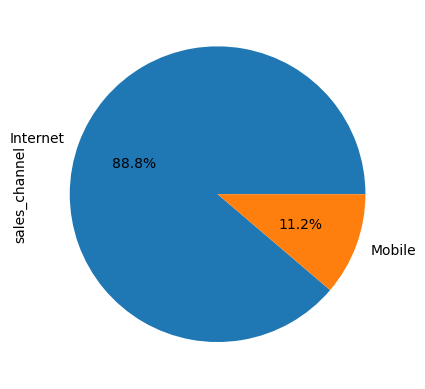

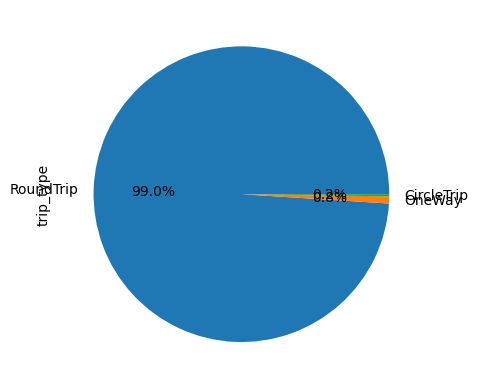

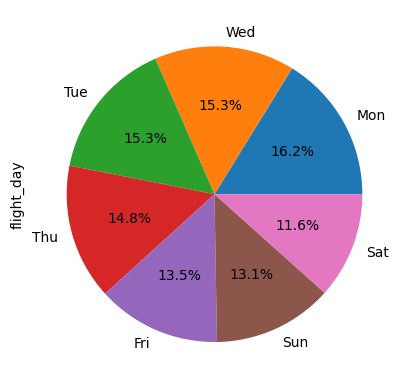

In [17]:
for col in df.select_dtypes('object'):
    if len(df[col].unique()) <=7 :
      plt.figure()
      df[col].value_counts().plot.pie(autopct='%1.1f%%')

In [18]:
df['booking_origin'].value_counts()

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

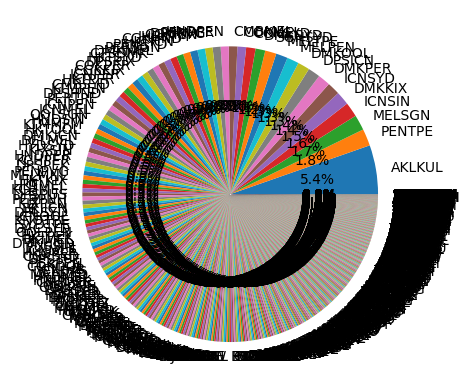

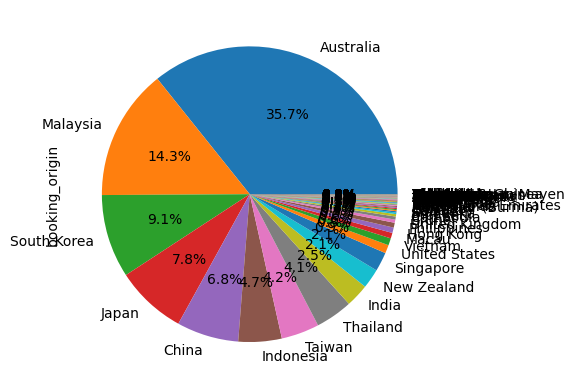

In [19]:
for col in df.select_dtypes('object'):
    if len(df[col].unique()) > 7 :
      plt.figure()
      df[col].value_counts().plot.pie(autopct='%1.1f%%')

In [20]:
df['route'].value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

### Relation Target / Variables

In [21]:
df.corr()

<ipython-input-21-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.212606,-0.115850,0.015607,0.120404,0.028544,0.022943,-0.063169,0.024116
purchase_lead,0.212606,1.000000,-0.076560,0.035973,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,-0.076560,1.000000,-0.024872,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,0.035973,-0.024872,1.000000,-0.011434,0.012171,0.013014,-0.002101,0.007127
wants_extra_baggage,0.120404,-0.022207,0.176757,-0.011434,1.000000,0.207669,0.216470,0.057054,0.068139
wants_preferred_seat,0.028544,-0.004499,0.032264,0.012171,0.207669,1.000000,0.315088,0.101289,0.050116
wants_in_flight_meals,0.022943,-0.022653,0.098828,0.013014,0.216470,0.315088,1.000000,0.154312,0.026511
flight_duration,-0.063169,0.067866,0.141181,-0.002101,0.057054,0.101289,0.154312,1.000000,-0.106266
booking_complete,0.024116,-0.022131,-0.042408,0.007127,0.068139,0.050116,0.026511,-0.106266,1.000000


In [22]:
sns.set_style('whitegrid')

In [23]:
def catplot(data_, x_, title_, xlabel_, kind='count'):
  # Create the catplot with hue and specify size and aspect ratio
  g = sns.catplot(data=data_, x=x_, kind='count', hue='booking_complete', height=6, aspect=1.5)

  # Get the total number of observations in each group
  total = float(len(df))

  # Loop over the bars and add the percentage as a text label
  for p in g.ax.patches:
      height = p.get_height()
      if height/total*100 >= 0.5 :
        g.ax.text(p.get_x()+p.get_width()/2.,
                  height + 3,
                  '{:.1f}%'.format(height/total*100),
                  ha="center", va='bottom')

  # Set title and axis labels
  g.set(title=title_, xlabel=xlabel_, ylabel='Count')

  # Show the plot
  plt.show()

In [24]:
def histplot(df_, x__, title__, xlabel__):
  plt.figure(figsize=(10, 6))
  # Create the histplot with hue and specify number of bins
  g = sns.histplot(data=df_, x=x__, hue='booking_complete', bins=30)

  # Get the total number of observations in each group
  total = float(len(df))

  # Loop over the bars and add the percentage as a text label
  for p in g.patches:
      height = p.get_height()
      if height/total*100 >= 0.5 :

        g.annotate('{:.1f}%'.format(height/total*100),
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 5), textcoords='offset points',
                    ha='center', va='bottom')

  # Set title and axis labels
  g.set(title=title__, xlabel=xlabel__, ylabel='Count')

  # Show the plot
  plt.show()

target / fight_duration

In [25]:
df['flight_duration'].value_counts()

8.83    14520
8.58     6965
5.62     5524
6.62     4721
7.00     3374
        ...  
5.00      241
7.42      224
4.83      156
5.13      125
9.50       37
Name: flight_duration, Length: 21, dtype: int64

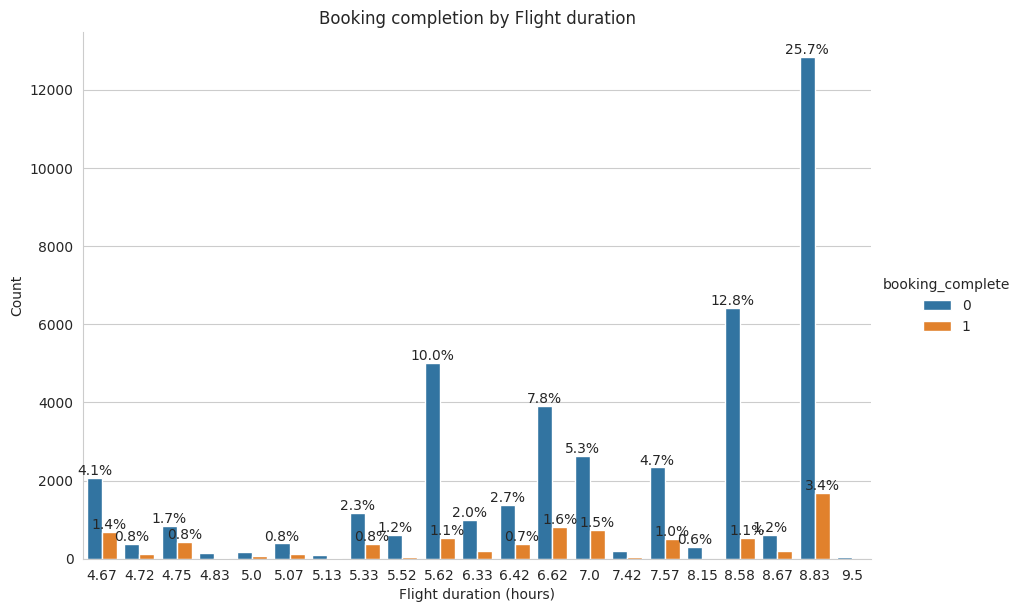

In [26]:
catplot(df, 'flight_duration', 'Booking completion by Flight duration', 'Flight duration (hours)')

target / purchase_lead

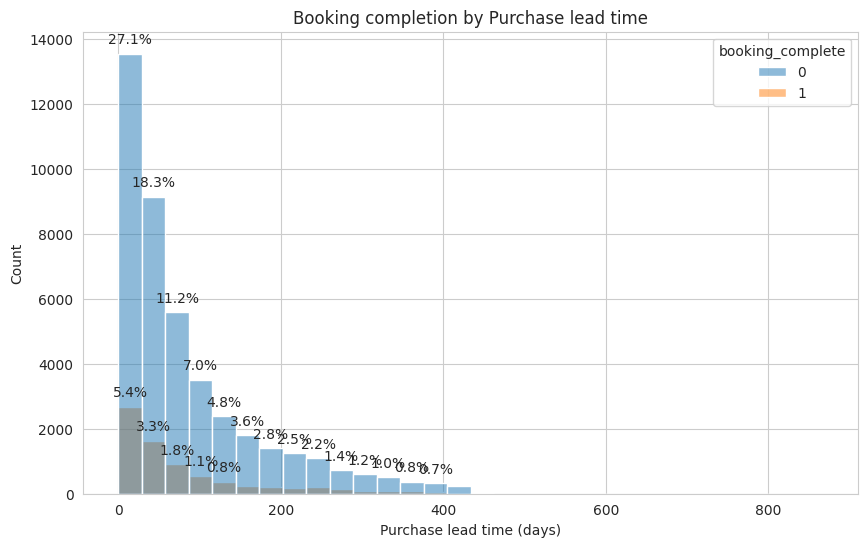

In [27]:
histplot(df, 'purchase_lead', 'Booking completion by Purchase lead time', 'Purchase lead time (days)')

target / length_of_stay

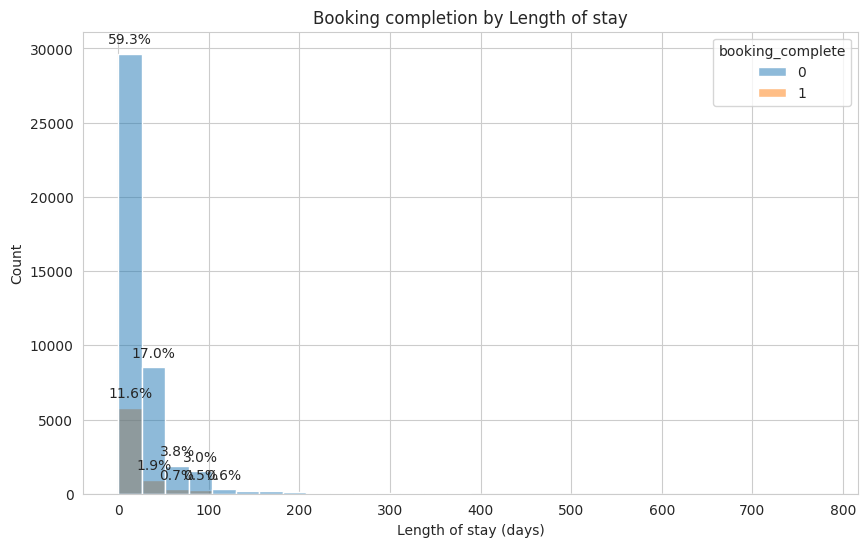

In [28]:
histplot(df, 'length_of_stay', 'Booking completion by Length of stay', 'Length of stay (days)')

target / number of passengers

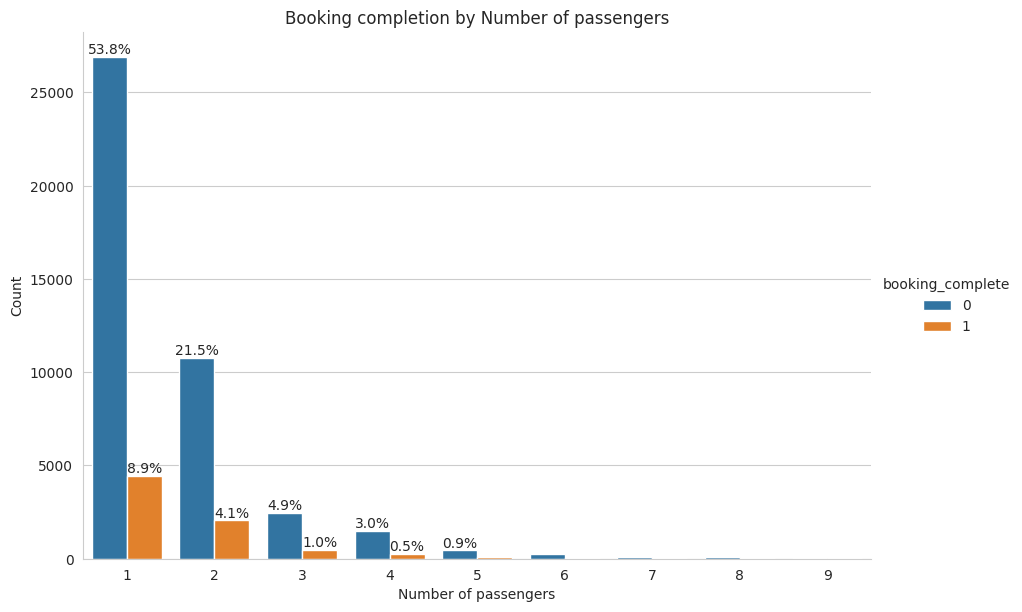

In [29]:
catplot(df, 'num_passengers', 'Booking completion by Number of passengers', 'Number of passengers')

target / flight_hour

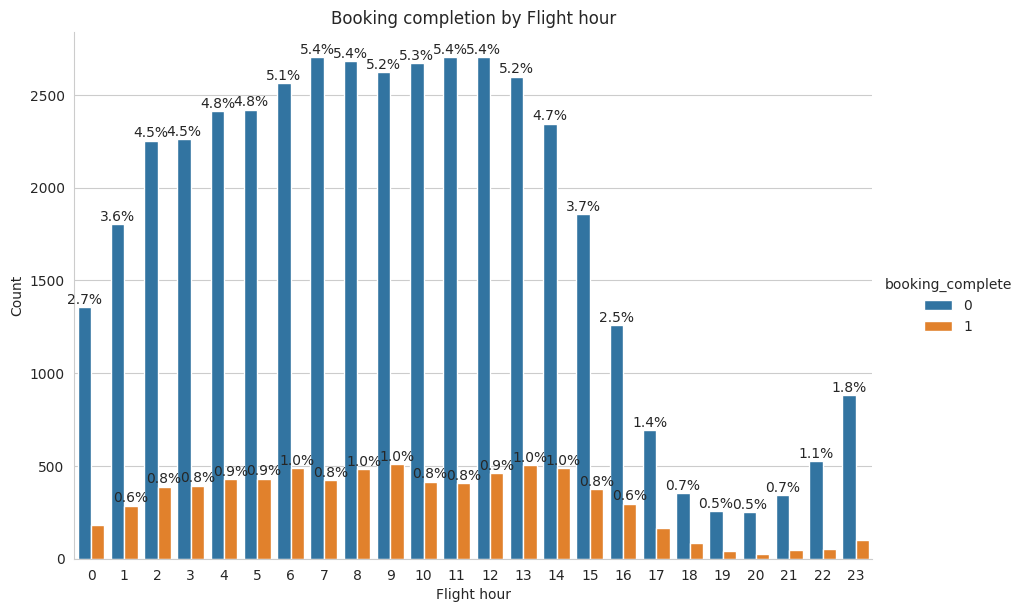

In [30]:
catplot(df, 'flight_hour', 'Booking completion by Flight hour', 'Flight hour')

target / num_passengers & sales_channel

In [31]:
df['sales_channel'].value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

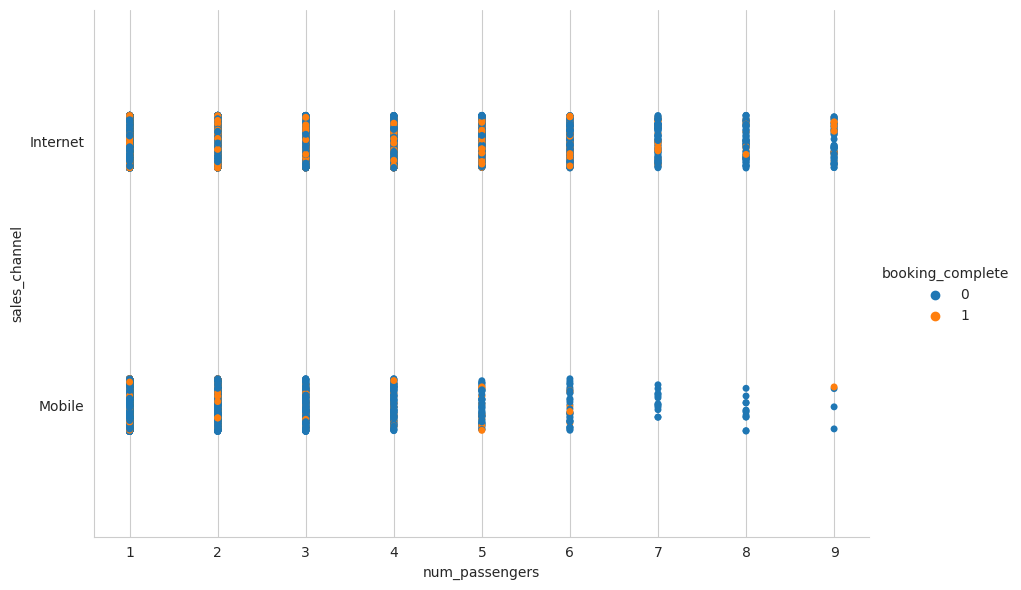

In [32]:
sns.catplot(data=df, x='num_passengers', y='sales_channel' ,hue='booking_complete', height=6,  aspect = 1.5)

target / num_passengers & trip_type

In [33]:
df['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

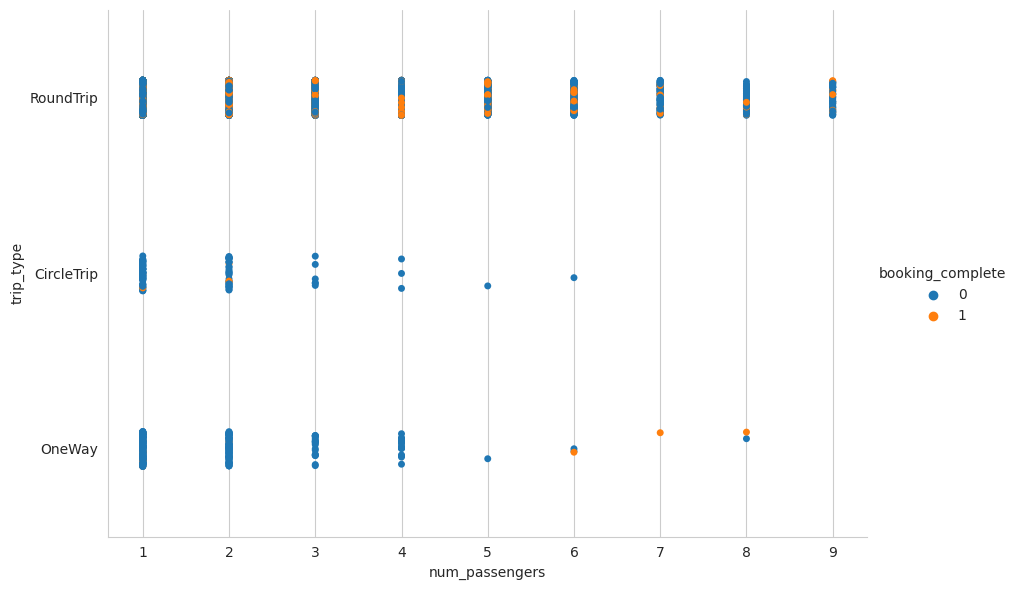

In [34]:
sns.catplot(data=df, x='num_passengers', y='trip_type', hue='booking_complete', height=6,  aspect = 1.5)

target / num_passengers & wants_in_flight_meals

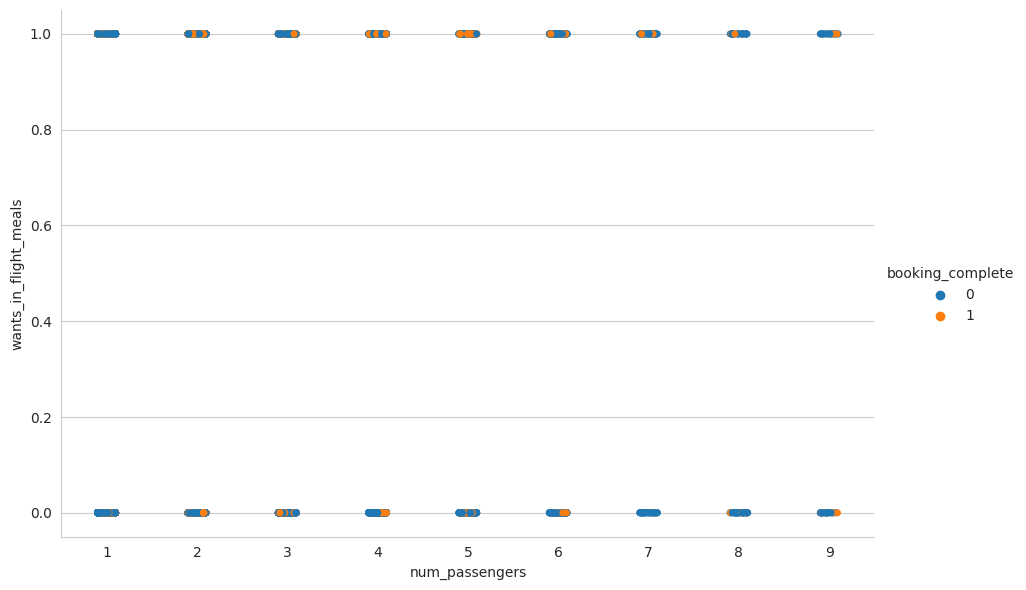

In [35]:
sns.catplot(data=df, x='num_passengers', y='wants_in_flight_meals', hue='booking_complete', height=6,  aspect = 1.5)

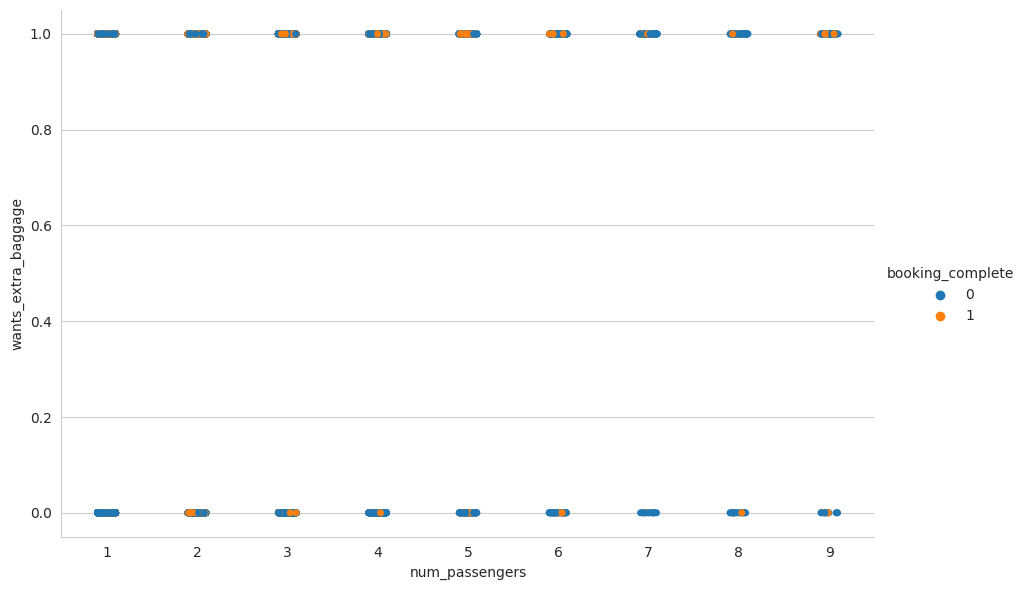

In [36]:
sns.catplot(data=df, x='num_passengers', y='wants_extra_baggage', hue='booking_complete', height=6,  aspect = 1.5)

#### success rate by booking_complete of each column

success rate by booking_complete of each flight_day

In [37]:
# HINT use groupby method on _x column and get the mean of booking_complete column
def Plot_rate_booking_complete_success_of(_x):
  x_success = df.groupby(_x)['booking_complete'].mean().sort_values(ascending=False).reset_index()
  if (_x == 'route'):
    x_success = x_success[(x_success['booking_complete'] >= 0.5) ]
  if (_x ==	'booking_origin'):
    x_success = x_success[(x_success['booking_complete'] >= 0.23) ]
  fig, ax=plt.subplots(figsize=(12,6))
  ax = sns.barplot(x=_x, y="booking_complete", data=x_success, hue='booking_complete', dodge=False)
  ax.set_title(f'Plot of success rate by booking_complete of each {_x}' , fontdict={'size':12})
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 10, rotation=90);

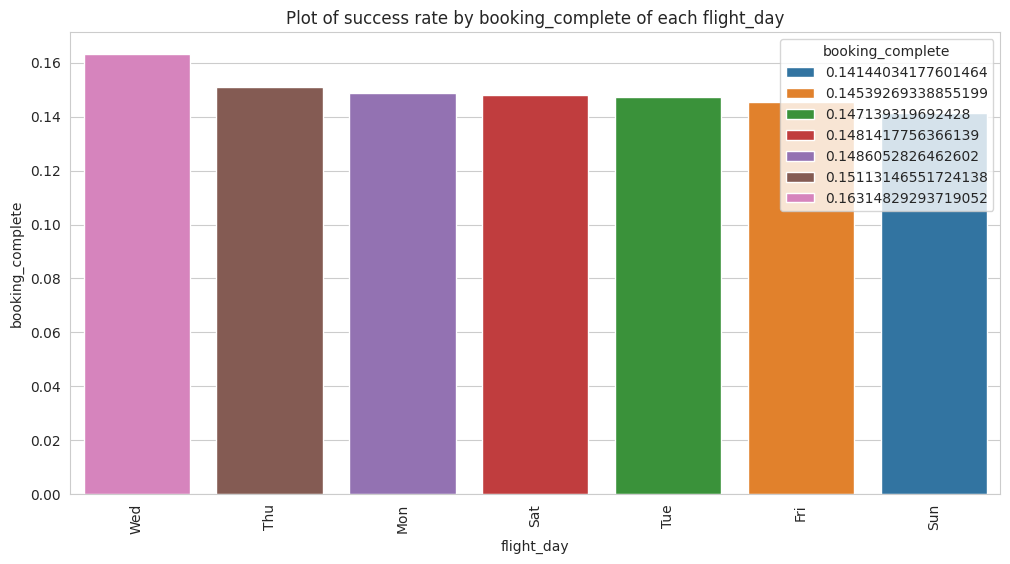

In [38]:
Plot_rate_booking_complete_success_of('flight_day')

success rate by booking_complete of each route

In [39]:
df['route'].value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [40]:
booking_origin_success = df.groupby('booking_origin')['booking_complete'].mean().sort_values(ascending=False).reset_index()
booking_origin_success = booking_origin_success[(booking_origin_success['booking_complete'] >= 0.5) & (booking_origin_success['booking_complete'] < 1)]
booking_origin_success

,booking_origin,booking_complete
4,Kazakhstan,0.666667
5,Bahrain,0.600000
6,Romania,0.500000


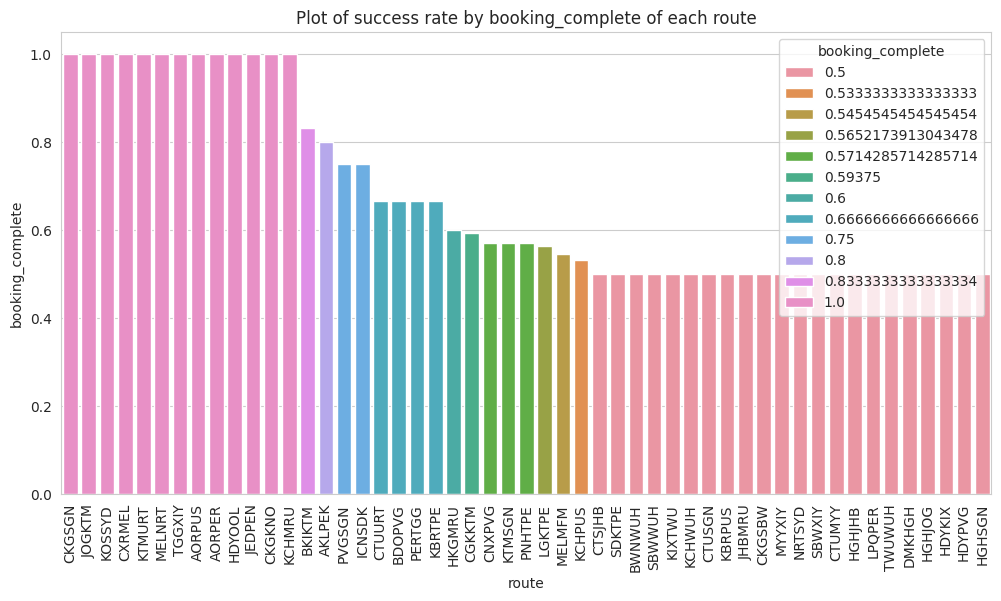

In [41]:
Plot_rate_booking_complete_success_of('route')

success rate by booking_complete of each booking_origin

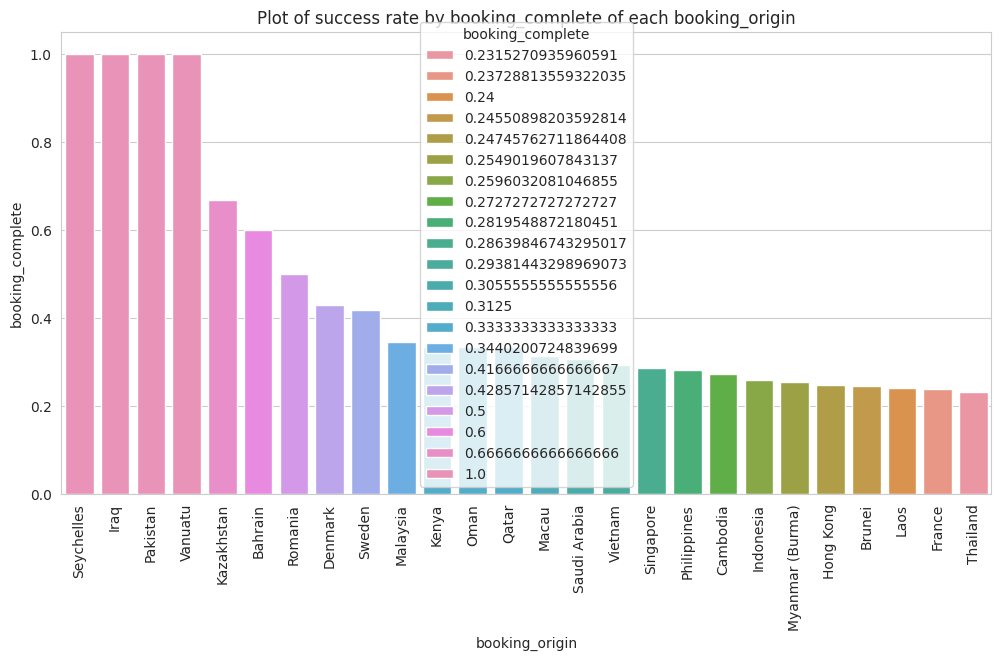

In [42]:
Plot_rate_booking_complete_success_of('booking_origin')

success rate by booking_complete of each wants_extra_baggage

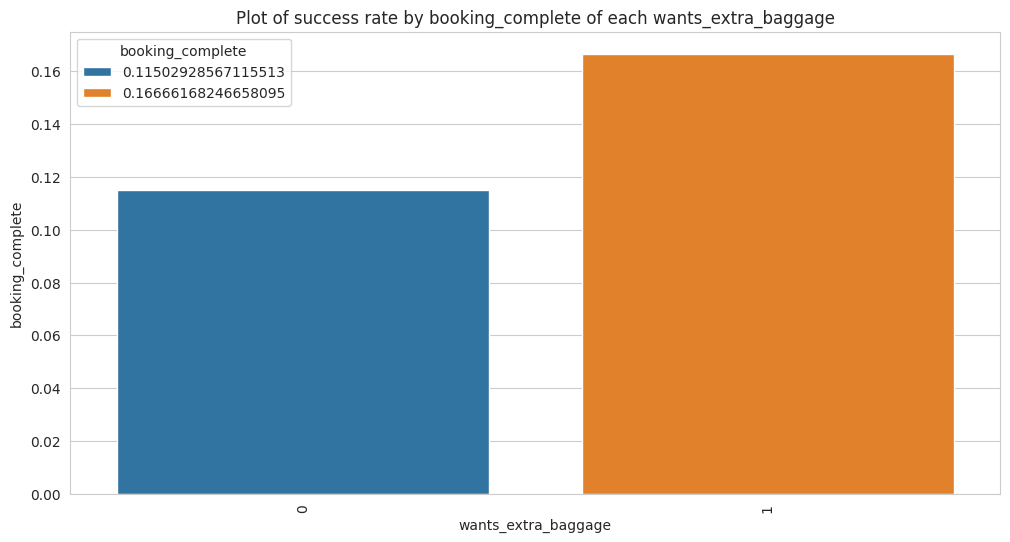

In [43]:
Plot_rate_booking_complete_success_of('wants_extra_baggage')

success rate by booking_complete of each num_passengers

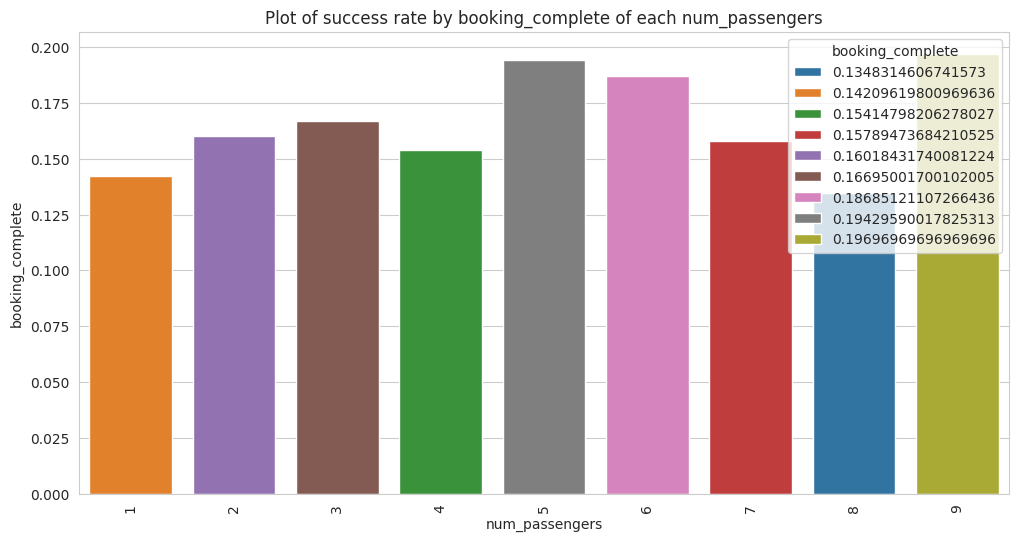

In [44]:
Plot_rate_booking_complete_success_of('num_passengers')

### Variables / Variables

In [45]:
colm_D_H=['num_passengers', 'purchase_lead',	'length_of_stay',	'flight_hour', 'flight_duration']

#### correlation colm_D_H

In [46]:
df[colm_D_H].corr()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration
num_passengers,1.000000,0.212606,-0.115850,0.015607,-0.063169
purchase_lead,0.212606,1.000000,-0.076560,0.035973,0.067866
length_of_stay,-0.115850,-0.076560,1.000000,-0.024872,0.141181
flight_hour,0.015607,0.035973,-0.024872,1.000000,-0.002101
flight_duration,-0.063169,0.067866,0.141181,-0.002101,1.000000


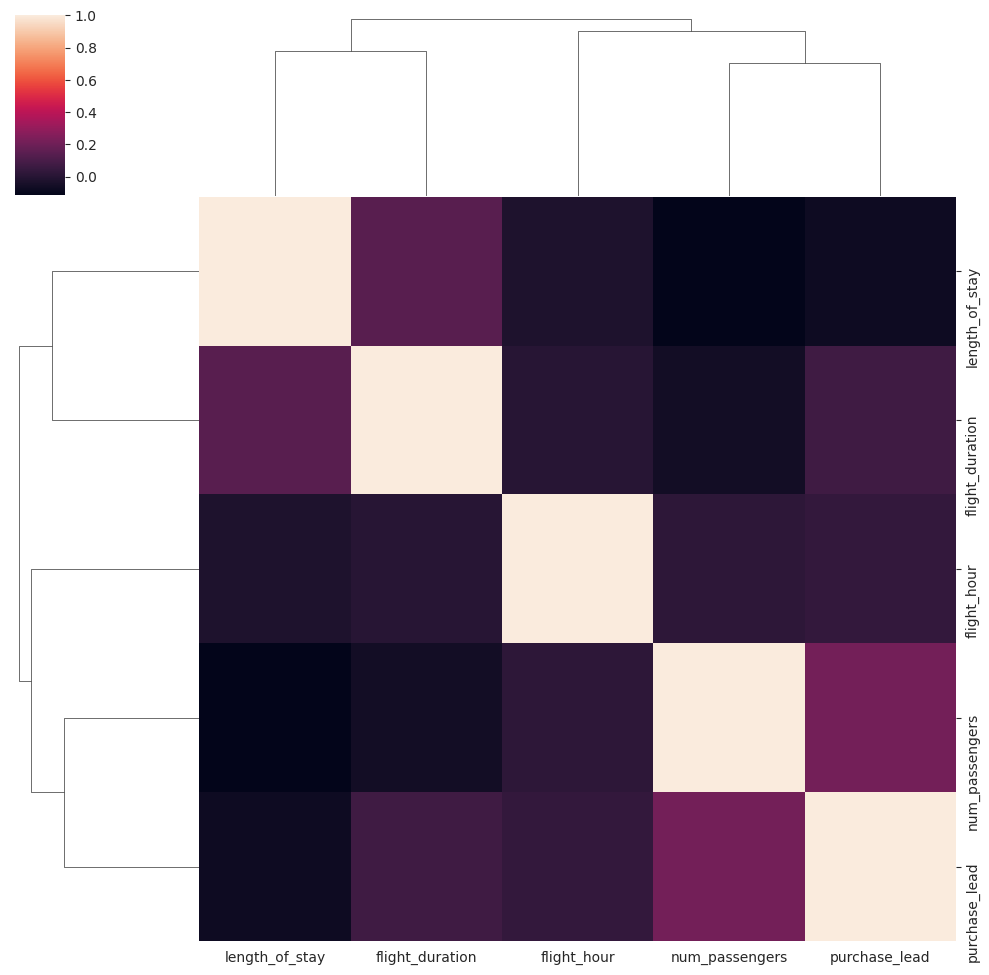

In [47]:
sns.clustermap(df[colm_D_H].corr())

<Figure size 640x480 with 0 Axes>

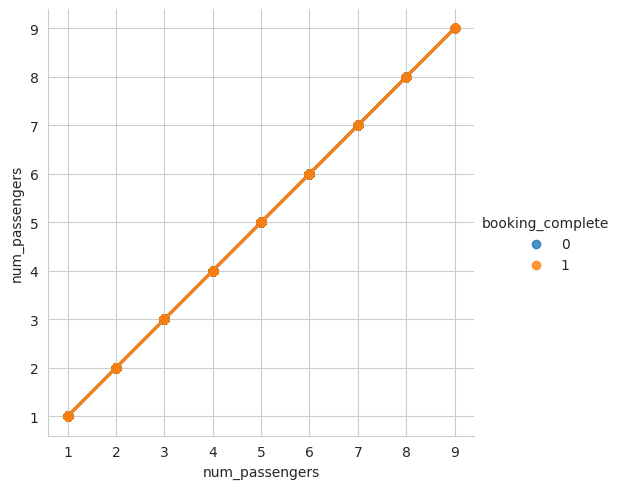

<Figure size 640x480 with 0 Axes>

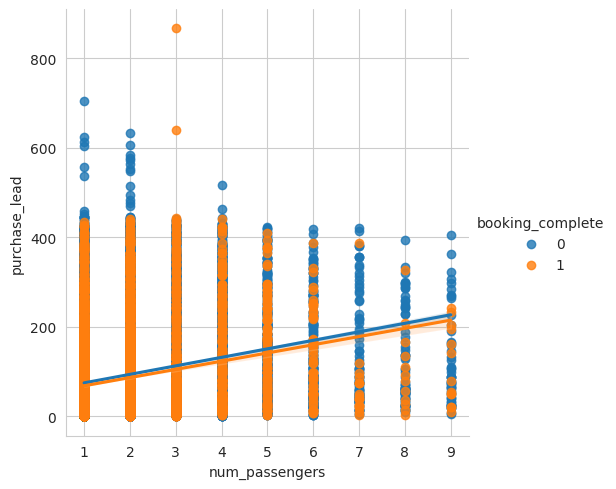

<Figure size 640x480 with 0 Axes>

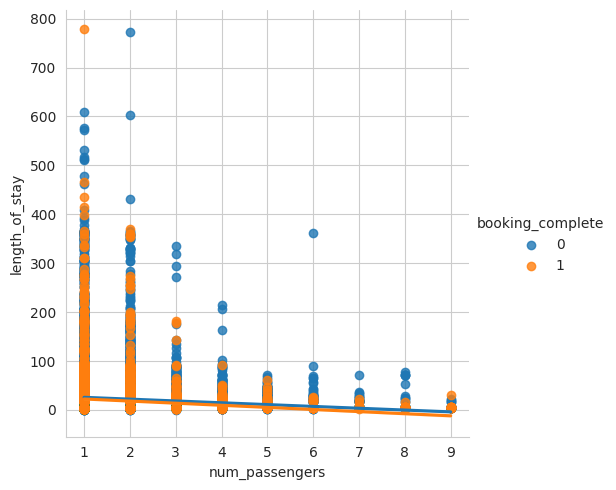

<Figure size 640x480 with 0 Axes>

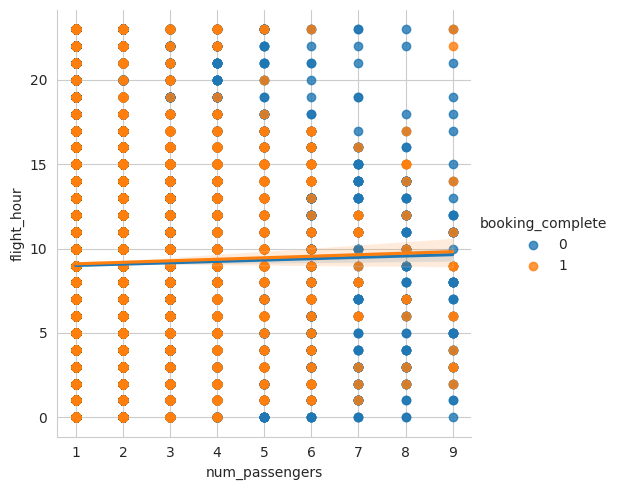

<Figure size 640x480 with 0 Axes>

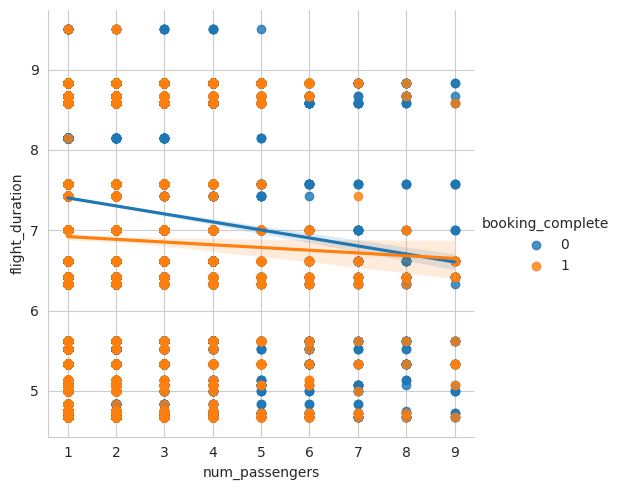

In [48]:
for col in colm_D_H:
    plt.figure()
    sns.lmplot(x='num_passengers', y=col, hue='booking_complete', data=df)

In [49]:
x_success = df.groupby('num_passengers').mean().reset_index()
x_success = x_success.rename(columns={'booking_complete' : 'booking_complete_x'})
x_success

<ipython-input-49-ef55c0e09a42>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x_success = df.groupby('num_passengers').mean().reset_index()


,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete_x
0,1,68.787797,26.054542,8.983701,0.623501,0.279217,0.421121,7.334135,0.142096
1,2,105.661903,19.555373,9.200875,0.721571,0.329428,0.423461,7.230318,0.160184
2,3,117.935736,15.901054,9.113567,0.774906,0.326420,0.462428,7.120561,0.166950
3,4,136.809978,14.293722,9.307175,0.816704,0.334641,0.485987,7.114496,0.154148
4,5,138.008913,12.818182,9.743316,0.832442,0.319073,0.458111,7.135437,0.194296
5,6,129.332180,10.740484,8.885813,0.816609,0.283737,0.467128,6.865052,0.186851
6,7,119.464912,9.228070,9.140351,0.850877,0.236842,0.491228,6.574298,0.157895
7,8,117.337079,10.719101,9.056180,0.730337,0.235955,0.359551,6.485730,0.134831
8,9,116.878788,6.257576,8.530303,0.772727,0.151515,0.378788,6.268939,0.196970


In [50]:
colm_bi=['wants_extra_baggage',	'wants_preferred_seat',	'wants_in_flight_meals']

#### relation colm_bi vs booking complete

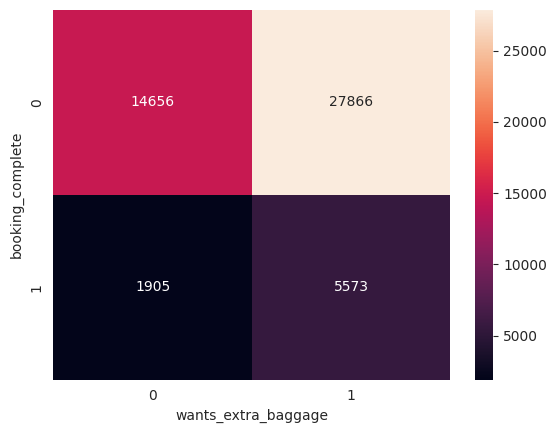

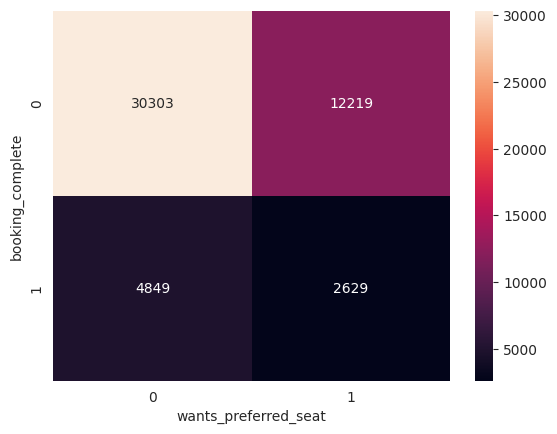

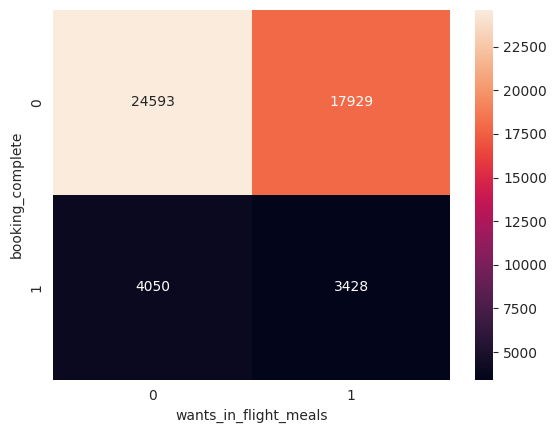

In [51]:
for col in colm_bi:
    plt.figure()
    sns.heatmap(pd.crosstab(df['booking_complete'], df[col]), annot=True, fmt='d')

In [52]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [53]:
df['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

#### completed vs uncompleted booking

In [54]:
completed_df = df[df['booking_complete'] == 1]
uncompleted_df = df[df['booking_complete'] == 0]

<ipython-input-55-3eb6ccb0e369>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(completed_df[col], label='positive')
<ipython-input-55-3eb6ccb0e369>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uncompleted_df[col], label='negative')
<ipython-input-55-3eb6ccb0e369>:3: UserWarning: 

`distplo

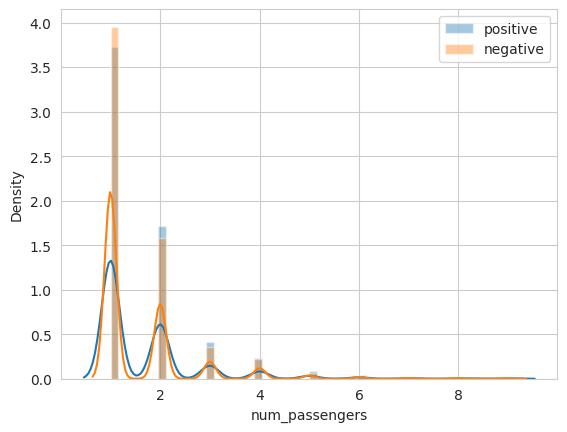

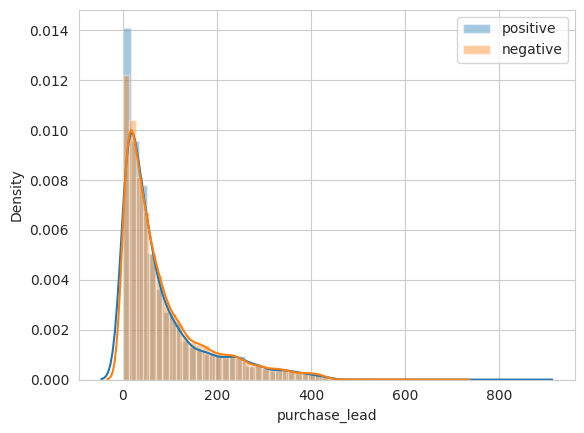

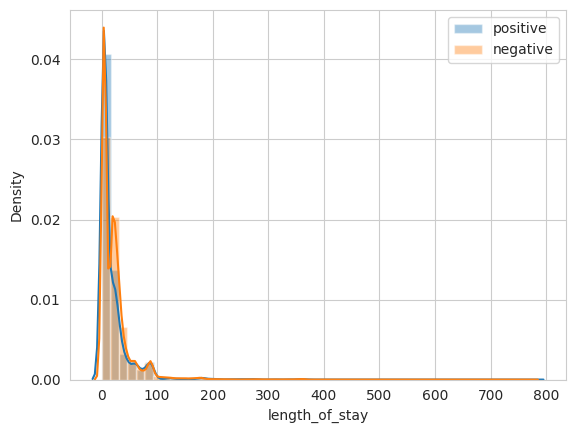

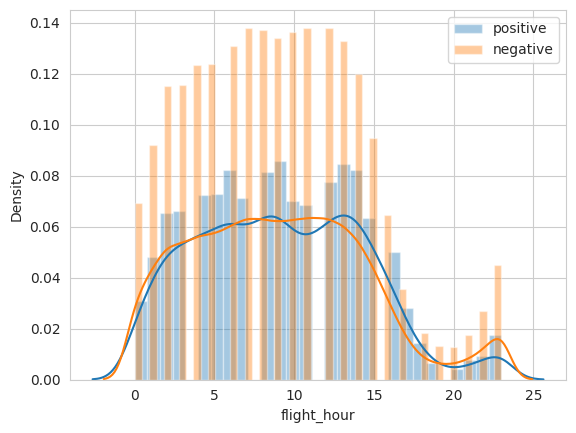

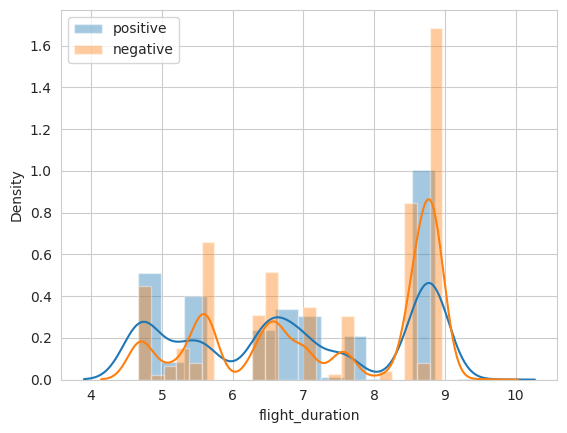

In [55]:
for col in colm_D_H:
    plt.figure()
    sns.distplot(completed_df[col], label='positive')
    sns.distplot(uncompleted_df[col], label='negative')
    plt.legend()

<ipython-input-56-9bc5cd547472>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(completed_df[col], label='positive')
<ipython-input-56-9bc5cd547472>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uncompleted_df[col], label='negative')
<ipython-input-56-9bc5cd547472>:3: UserWarning: 

`distplo

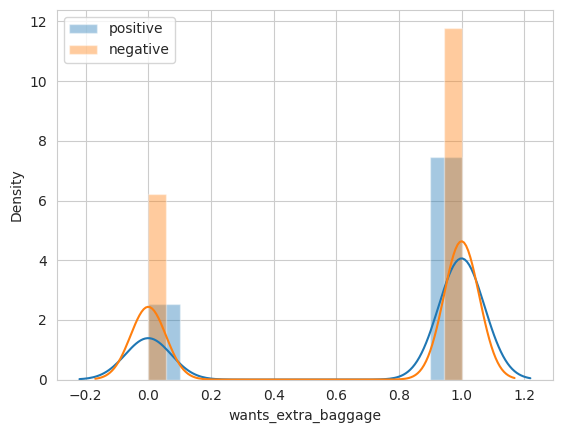

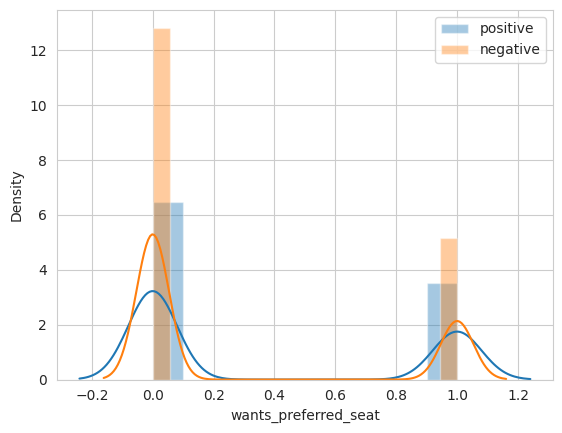

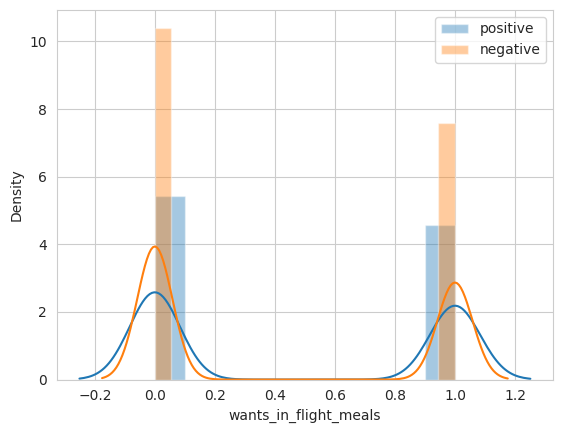

In [56]:
for col in colm_bi:
    plt.figure()
    sns.distplot(completed_df[col], label='positive')
    sns.distplot(uncompleted_df[col], label='negative')
    plt.legend()

### T-test

In [57]:
from scipy.stats import ttest_ind

In [60]:
balanced_uncompleted_df = uncompleted_df.sample(completed_df.shape[0])

In [71]:
def t_test(col):
    alpha = 0.05
    stat, p = ttest_ind(balanced_uncompleted_df[col], completed_df[col])
    if p < alpha:
        return 'H0 Rejeted'
    else :
        return 0

In [72]:
for col in colm_D_H:
    print(f'{col :-<50} {t_test(col)}')

num_passengers------------------------------------ H0 Rejetée
purchase_lead------------------------------------- H0 Rejetée
length_of_stay------------------------------------ H0 Rejetée
flight_hour--------------------------------------- 0
flight_duration----------------------------------- H0 Rejetée


### Chi2-test

In [83]:
import scipy.stats as stats

def chi2_test(col):
  # Create a contingency table
  contingency_table = pd.crosstab(df['booking_complete'], df[col])

  # Perform the Chi-squared test for independence
  chi2_stat, p_val, _, _ = stats.chi2_contingency(contingency_table)

  # Print the test result
  print("Chi-squared Statistic:", chi2_stat)
  print("P-value:", p_val)

  # Check the p-value to determine statistical significance
  alpha = 0.05
  if p_val < alpha:
      return 'H0 rejected'
      #print("Reject the null hypothesis. There is a significant association between the binary features.")
  else:
      return 0
      #print("Fail to reject the null hypothesis. There is no significant association between the binary features.")


In [85]:
for col in colm_bi:
    print(f'{col :-<50} {chi2_test(col)}')

Chi-squared Statistic: 231.73706388226566
P-value: 2.491861960070551e-52
wants_extra_baggage------------------------------- H0 rejected
Chi-squared Statistic: 125.27310853832702
P-value: 4.4350760727496255e-29
wants_preferred_seat------------------------------ H0 rejected
Chi-squared Statistic: 34.991040728749795
P-value: 3.3122586117907485e-09
wants_in_flight_meals----------------------------- H0 rejected


## PRE-PROCESSING

In [155]:
dft = df.copy()

### TrainTest - Nettoyage - Encodage

In [156]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(dft, test_size=0.2, random_state=0)

In [157]:
trainset.shape

(40000, 14)

In [158]:
trainset['booking_complete'].value_counts()

0    34035
1     5965
Name: booking_complete, dtype: int64

In [159]:
testset['booking_complete'].value_counts()

0    8487
1    1513
Name: booking_complete, dtype: int64

In [160]:
dft.head(1)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0


In [161]:
def find_similar(liste1, liste2):
    # Use the intersection operator "&" to find common elements
    similar = list(set(liste1) & set(liste2))
    return similar

In [162]:
def supp(trainset, testset, colm):
  # Compter le nombre d'occurrences de chaque valeur dans la colonne colm
  colm_counts_train = trainset[colm].value_counts()
  colm_counts_test = testset[colm].value_counts()

  # Créer un masque booléen pour sélectionner les valeurs avec plus de 50 occurrences
  mask_train = colm_counts_train[trainset[colm]].values >= 50
  mask_test = colm_counts_test[testset[colm]].values >= 50

  # Supprimer les valeurs
  trainset = trainset[mask_train]
  testset = testset[mask_test]

  # Find similar routes between trainset and testset
  colm_sim = find_similar(trainset[colm].unique(), testset[colm].unique())
  # Filter trainset to contain only lines corresponding to similar colms
  trainset = trainset[trainset[colm].isin(colm_sim)]
  # Filter testset to contain only lines corresponding to similar colms
  testset = testset[testset[colm].isin(colm_sim)]


  return trainset, testset

In [163]:
trainset, testset = supp(trainset, testset,'route')

In [164]:
trainset, testset = supp(trainset, testset,'booking_origin')

In [165]:
# Find similar routes between trainset and testset
route_sim = find_similar(trainset['route'].unique(), testset['route'].unique())
# Filter trainset to contain only lines corresponding to similar routes
trainset = trainset[trainset['route'].isin(route_sim)]
# Filter testset to contain only lines corresponding to similar routes
testset = testset[testset['route'].isin(route_sim)]

# Find similar routes between trainset and testset
origin_sim = find_similar(trainset['booking_origin'].unique(), testset['booking_origin'].unique())
# Filter trainset to contain only lines corresponding to similar booking_origin
trainset = trainset[trainset['booking_origin'].isin(origin_sim)]
# Filter testset to contain only lines corresponding to similar booking_origin
testset = testset[testset['booking_origin'].isin(origin_sim)]


In [166]:
trainset['route'].value_counts()

AKLKUL    1985
PENTPE     747
MELSGN     665
ICNSIN     643
DMKKIX     566
          ... 
KCHPER     202
HNDPER     201
DELMEL     191
HKTKIX     178
PERPNH     151
Name: route, Length: 49, dtype: int64

In [167]:
testset['route'].value_counts()

AKLKUL    496
DMKKIX    165
MELSGN    162
PENTPE    155
ICNSIN    141
         ... 
KIXSIN     53
PERPNH     50
KCHPER     49
CMBSYD     47
HYDSYD     47
Name: route, Length: 49, dtype: int64

In [168]:
testset['booking_origin'].value_counts()

Australia      1816
Malaysia        775
South Korea     442
Japan           371
Thailand        280
New Zealand     185
Indonesia       156
Taiwan          143
Singapore       117
China            90
India            57
Macau            56
Vietnam          50
Name: booking_origin, dtype: int64

In [169]:
trainset['booking_origin'].value_counts()

Australia      7139
Malaysia       3151
South Korea    1845
Japan          1480
Thailand       1038
New Zealand     793
Indonesia       691
Taiwan          550
Singapore       464
China           295
Macau           205
Vietnam         190
India           187
Name: booking_origin, dtype: int64

In [170]:
def categorize_flight_time(hour):
        if 0 <= hour < 6:
            return 'Night'
        elif 6 <= hour < 12:
            return 'Morning'
        elif 12 <= hour < 18:
            return 'Afternoon'
        else:
            return 'Evening'

In [171]:
def encodage(df):

    df['flight_time_of_day'] = df['flight_hour'] // 100  # Extract hour
    df['flight_time_of_day'] = df['flight_time_of_day'].apply(categorize_flight_time)


    # Transform into categorical type
    df['sales_channel'] = df['sales_channel'].astype('category')
    df = pd.get_dummies(df, columns=['sales_channel'], prefix='channel', drop_first=True)

    df['trip_type'] = df['trip_type'].astype('category')
    df = pd.get_dummies(df, columns=['trip_type'], prefix='trip', drop_first=True)

    df['flight_day'] = df['flight_day'].astype('category')
    df = pd.get_dummies(df, columns=['flight_day'], prefix='day', drop_first=True)

    df['route'] = df['route'].astype('category')
    df = pd.get_dummies(df, columns=['route'], prefix='route', drop_first=True)

    df['booking_origin'] = df['booking_origin'].astype('category')
    df = pd.get_dummies(df, columns=['booking_origin'], prefix='booking_origin', drop_first=True)

    df['flight_time_of_day'] = df['flight_time_of_day'].astype('category')
    df = pd.get_dummies(df, columns=['flight_time_of_day'], prefix='flight_time_of_day', drop_first=True)

    return df

In [172]:
def encodage1(df):
    # Transform into categorical type
    df['sales_channel'] = df['sales_channel'].astype('category')
    df['trip_type'] = df['trip_type'].astype('category')
    df['flight_day'] = df['flight_day'].astype('category')
    df['route'] = df['route'].astype('category')
    df['booking_origin'] = df['booking_origin'].astype('category')
    df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'])

    return df

In [173]:
def feature_engineering(df):

    df['avg_length_of_stay_per_passenger'] = df['length_of_stay'] / df['num_passengers']
    df['avg_flight_duration_per_passenger'] = df['flight_duration'] / df['num_passengers']

    df['total_purchase_amount'] = df['num_passengers'] * df['purchase_lead']

    # combining num_passengers and length_of_stay to get the total group size.
    df['total_group_size'] = df['num_passengers'] * df['length_of_stay']


    return df

In [174]:
def imputation(df):
    #df['is na'] = (df['sales_channel'].isna()) | (df['trip_type'].isna())
    #df = df.fillna(-999)
    #df = df[['purchase_lead', 'flight_hour', 'length_of_stay', 'booking_origin_Malaysia', 'num_passengers', 'flight_duration', 'wants_in_flight_meals', 'wants_preferred_seat', 'booking_origin_Australia', 'day_Mon', 'day_Thu', 'day_Tue', 'day_Wed', 'day_Fri', 'day_Sun', 'wants_extra_baggage', 'booking_origin_South Korea', 'day_Sat', 'booking_origin_Japan', 'route_ICNPEN', 'channel_Mobile', 'route_DMKKIX', 'route_AKLKUL', 'route_HNDPEN', 'booking_complete']]
    df = df[(4.67 <= df['flight_duration']) & (df['purchase_lead'] < 200) & (df['length_of_stay'] < 100) & (df['num_passengers'] < 4)]
    df = df[df['flight_duration']<8.83]
    df = df.dropna(axis=0)
    return  df

In [175]:
def preprocessing(df):

    df = encodage(df)
    df = feature_engineering(df)
    df = imputation(df)

    X = df.drop('booking_complete', axis=1)
    y = df['booking_complete']

    print(y.value_counts())

    return X, y

In [176]:
X_train, y_train = preprocessing(trainset)

0    8344
1    1661
Name: booking_complete, dtype: int64


In [177]:
X_train.shape

(10005, 81)

In [178]:
X_test, y_test = preprocessing(testset)

0    2081
1     405
Name: booking_complete, dtype: int64


In [179]:
X_test.shape

(2486, 81)

### Modelisation

In [180]:
from sklearn.tree import DecisionTreeClassifier

In [181]:
model = DecisionTreeClassifier(random_state=0)

### Evaluation procedure

In [182]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [183]:

def evaluation(model):

    model.fit(X_train, y_train)
    ypred = model.predict(X_test)

    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))

    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=5, scoring='f1',
                                               train_sizes=np.linspace(0.05, 1, 20))


    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    return ypred




[[1767  314]
 [ 272  133]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2081
           1       0.30      0.33      0.31       405

    accuracy                           0.76      2486
   macro avg       0.58      0.59      0.58      2486
weighted avg       0.77      0.76      0.77      2486



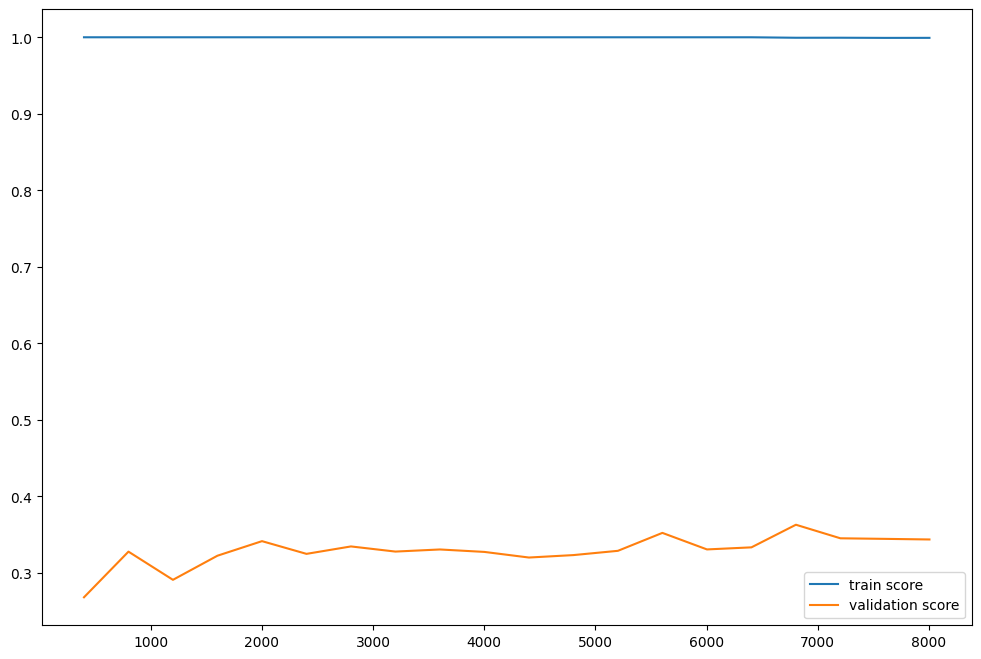

In [184]:
ypredict = evaluation(model)

In [185]:
from sklearn import metrics
print(f"Accuracy: {metrics.accuracy_score(y_test, ypredict)}")
print(f"Precision: {metrics.precision_score(y_test, ypredict)}")
print(f"Recall: {metrics.recall_score(y_test, ypredict)}")

Accuracy: 0.7642799678197908
Precision: 0.2975391498881432
Recall: 0.32839506172839505


Accuracy: 0.7642799678197908

Precision: 0.2975391498881432

Recall: 0.32839506172839505

Looking at these results there are a few things to point out:

Note: If you are running this notebook yourself, you may get slightly different answers!

Looking at the accuracy score, this is very misleading! Hence the use of precision and recall
is important. The accuracy score is a little high, but it does not tell us the whole story.

Looking at the precision score, this shows us a score of 0.29 which is bad, but could be improved.

And the recall shows us a score of 0.32 which the classifier has a poor ability to identify positive samples. This would be the main concern for improving this model!

So overall, we're able to very accurately identify clients that complete booking and not able to predict cases where clients do not complete booking!


<Axes: >

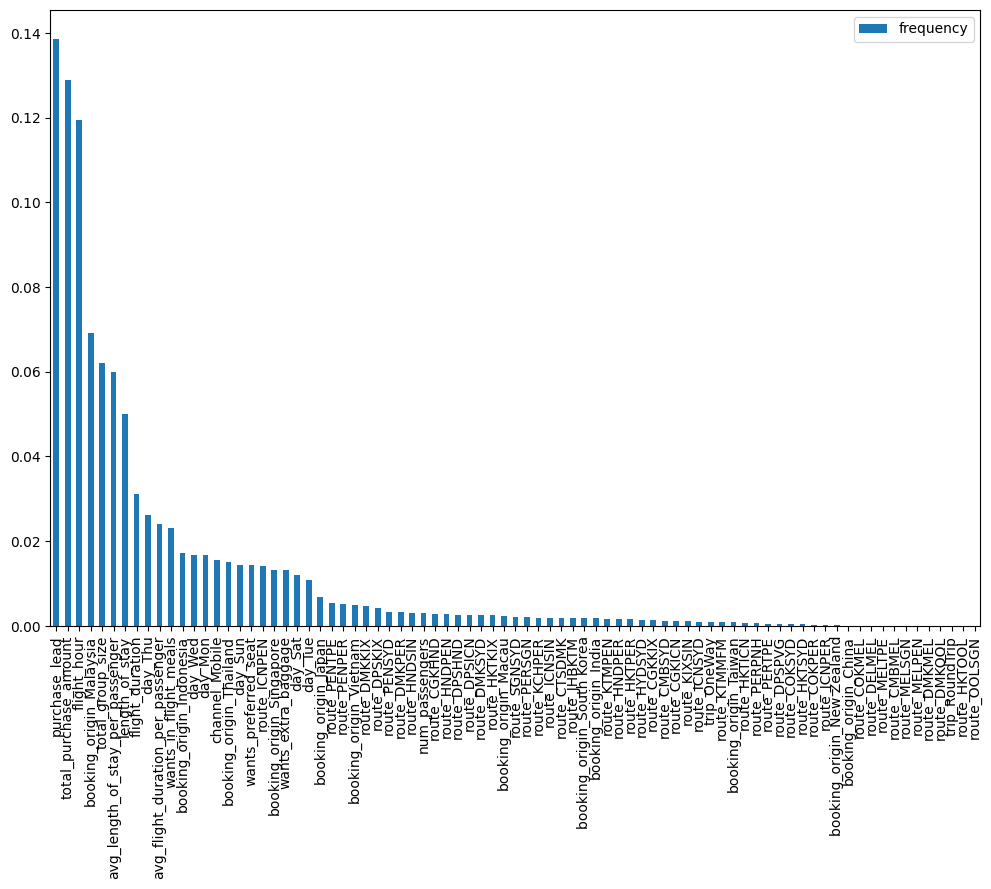

In [186]:

pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["frequency"]).sort_values(by="frequency", ascending=False).plot.bar(figsize=(12, 8))

## Modellisation 2

In [187]:
import warnings
warnings.filterwarnings("ignore", message="Features .* are constant.")
warnings.filterwarnings("ignore", message="invalid value encountered in divide")
warnings.filterwarnings("ignore", message="Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.")


In [188]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [189]:
preprocessor = make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif, k=75))

In [190]:
DecisionTree = make_pipeline(SelectKBest(f_classif, k=75), DecisionTreeClassifier(random_state=0))
RandomForest = make_pipeline(SelectKBest(f_classif, k=75), RandomForestClassifier(n_jobs=-1, random_state=0))
'''AdaBoost = AdaBoostClassifier(random_state=0)
SVM = make_pipeline( StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(StandardScaler(), KNeighborsClassifier())'''


'AdaBoost = AdaBoostClassifier(random_state=0)\nSVM = make_pipeline( StandardScaler(), SVC(random_state=0))\nKNN = make_pipeline(StandardScaler(), KNeighborsClassifier())'

In [191]:
dict_of_models = {'DecisionTree' : DecisionTree,

                 }

DecisionTree
[[1774  307]
 [ 262  143]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2081
           1       0.32      0.35      0.33       405

    accuracy                           0.77      2486
   macro avg       0.59      0.60      0.60      2486
weighted avg       0.78      0.77      0.78      2486



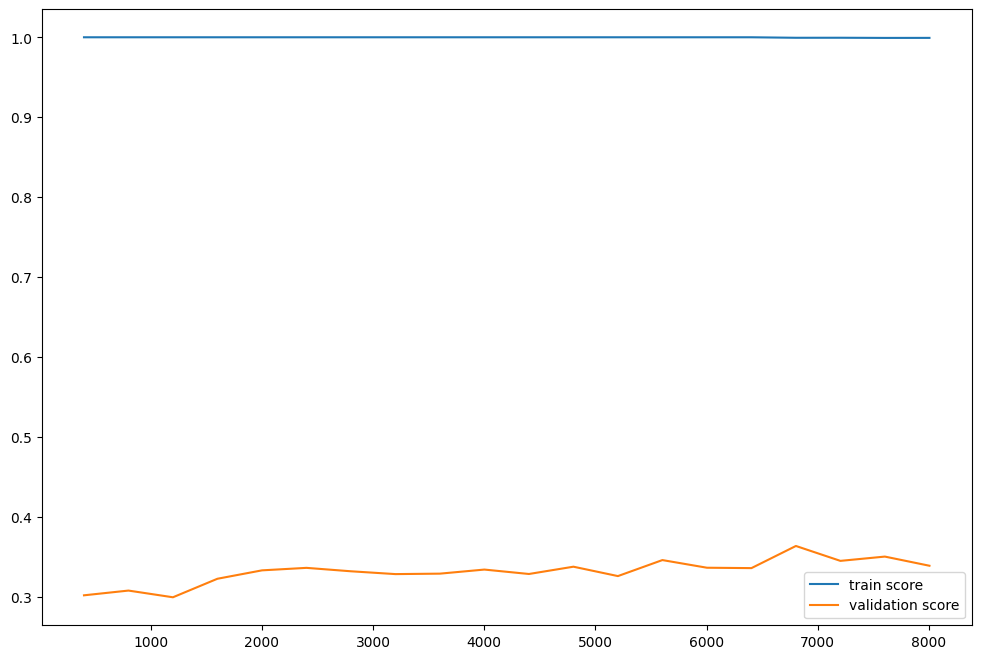

In [192]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

### Optimisation

In [193]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [194]:
DecisionTree['decisiontreeclassifier'].get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [195]:
param_grid = {
    #'decisiontreeclassifier__ccp_alpha': [0.0, 0.1, 0.2],  # Adjust the values as needed
    'decisiontreeclassifier__class_weight':[None, {0: 1, 1: 3}, {0: 1, 1: 2}, {0: 1, 1: 4}],
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [None, 5, 10],
    'decisiontreeclassifier__max_features': [None, 'sqrt', 'log2'],
    'decisiontreeclassifier__max_leaf_nodes': [None, 10, 20],
    #'decisiontreeclassifier__min_impurity_decrease': [0.0, 0.1, 0.2],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
    'decisiontreeclassifier__min_samples_split': [2, 5],#, 10],
    #'decisiontreeclassifier__min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'decisiontreeclassifier__splitter': ['best', 'random'],
    #'pipeline__polynomialfeatures__degree':[2, 3],
    'selectkbest__k': range(55, 65)
}

{'selectkbest__k': 55, 'decisiontreeclassifier__splitter': 'best', 'decisiontreeclassifier__min_samples_split': 5, 'decisiontreeclassifier__min_samples_leaf': 2, 'decisiontreeclassifier__max_leaf_nodes': 20, 'decisiontreeclassifier__max_features': None, 'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__class_weight': {0: 1, 1: 4}}
[[1392  689]
 [  73  332]]
              precision    recall  f1-score   support

           0       0.95      0.67      0.79      2081
           1       0.33      0.82      0.47       405

    accuracy                           0.69      2486
   macro avg       0.64      0.74      0.63      2486
weighted avg       0.85      0.69      0.73      2486



array([1, 0, 0, ..., 0, 0, 0])

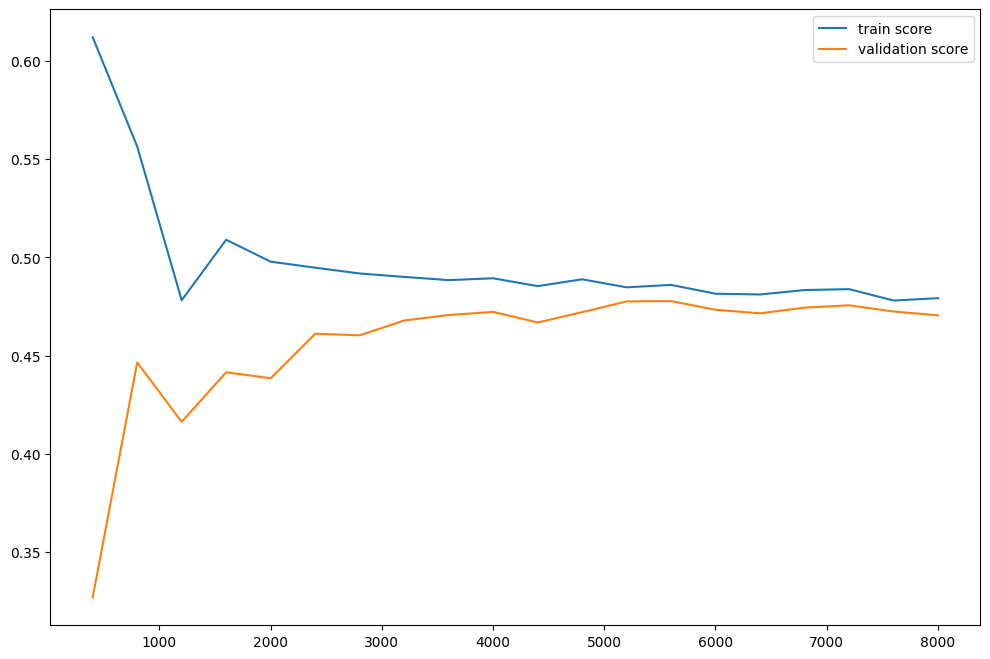

In [196]:
grid = RandomizedSearchCV(DecisionTree, param_grid, scoring='recall', cv=5,
                          n_iter=200)

grid.fit(X_train, y_train)

print(grid.best_params_)

evaluation(grid.best_estimator_)

{'selectkbest__k': 59, 'decisiontreeclassifier__splitter': 'best', 'decisiontreeclassifier__min_samples_split': 5, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__max_leaf_nodes': 10, 'decisiontreeclassifier__max_features': None, 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__class_weight': {0: 1, 1: 3}}
[[1500  581]
 [  89  316]]
              precision    recall  f1-score   support

           0       0.94      0.72      0.82      2081
           1       0.35      0.78      0.49       405

    accuracy                           0.73      2486
   macro avg       0.65      0.75      0.65      2486
weighted avg       0.85      0.73      0.76      2486



array([0, 0, 0, ..., 0, 0, 1])

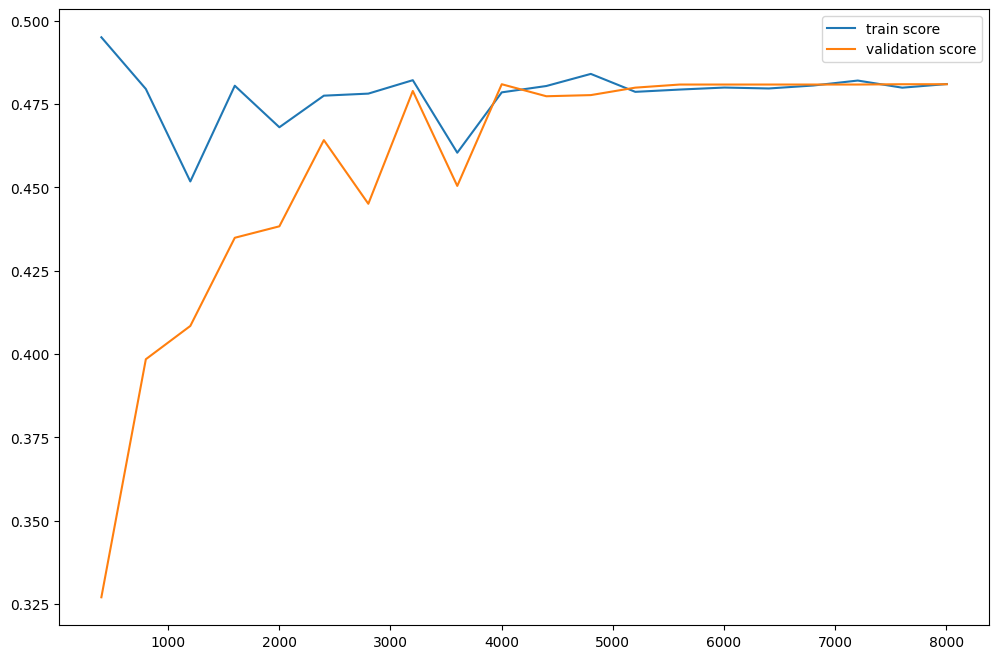

In [197]:
grid = RandomizedSearchCV(DecisionTree, param_grid, scoring='f1', cv=4,
                          n_iter=200)

grid.fit(X_train, y_train)

print(grid.best_params_)

evaluation(grid.best_estimator_)

{'selectkbest__k': 58, 'decisiontreeclassifier__splitter': 'best', 'decisiontreeclassifier__min_samples_split': 2, 'decisiontreeclassifier__min_samples_leaf': 2, 'decisiontreeclassifier__max_leaf_nodes': 10, 'decisiontreeclassifier__max_features': None, 'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__class_weight': {0: 1, 1: 3}}
[[1500  581]
 [  89  316]]
              precision    recall  f1-score   support

           0       0.94      0.72      0.82      2081
           1       0.35      0.78      0.49       405

    accuracy                           0.73      2486
   macro avg       0.65      0.75      0.65      2486
weighted avg       0.85      0.73      0.76      2486



array([0, 0, 0, ..., 0, 0, 1])

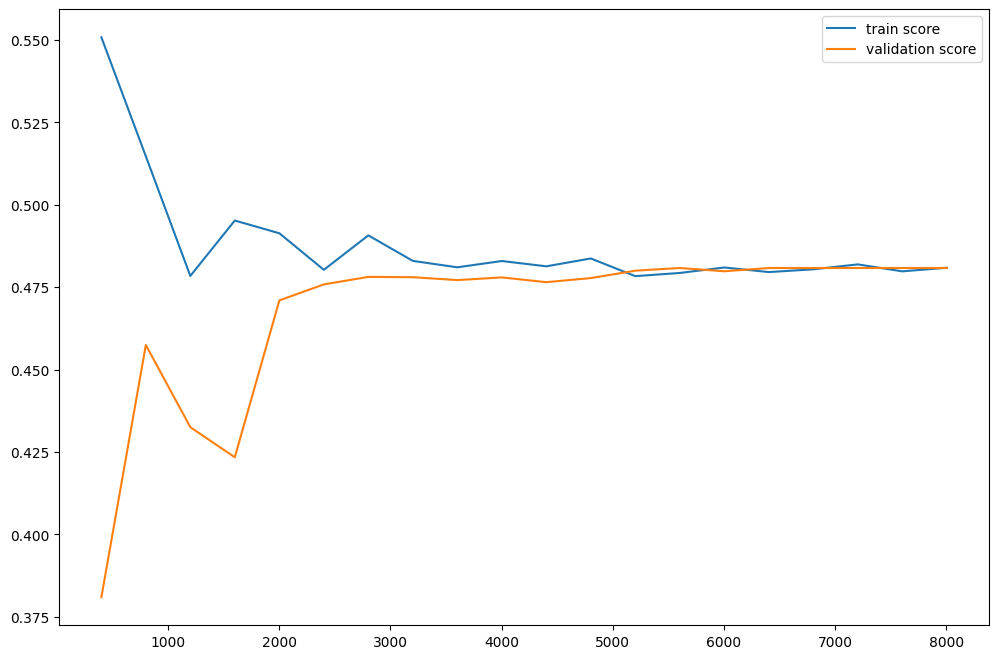

In [198]:
grid = RandomizedSearchCV(DecisionTree, param_grid, scoring='f1', cv=4,
                          n_iter=280)

grid.fit(X_train, y_train)

print(grid.best_params_)

evaluation(grid.best_estimator_)

{'selectkbest__k': 64, 'decisiontreeclassifier__splitter': 'best', 'decisiontreeclassifier__min_samples_split': 5, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__max_leaf_nodes': 10, 'decisiontreeclassifier__max_features': None, 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__class_weight': {0: 1, 1: 3}}
[[1500  581]
 [  89  316]]
              precision    recall  f1-score   support

           0       0.94      0.72      0.82      2081
           1       0.35      0.78      0.49       405

    accuracy                           0.73      2486
   macro avg       0.65      0.75      0.65      2486
weighted avg       0.85      0.73      0.76      2486



array([0, 0, 0, ..., 0, 0, 1])

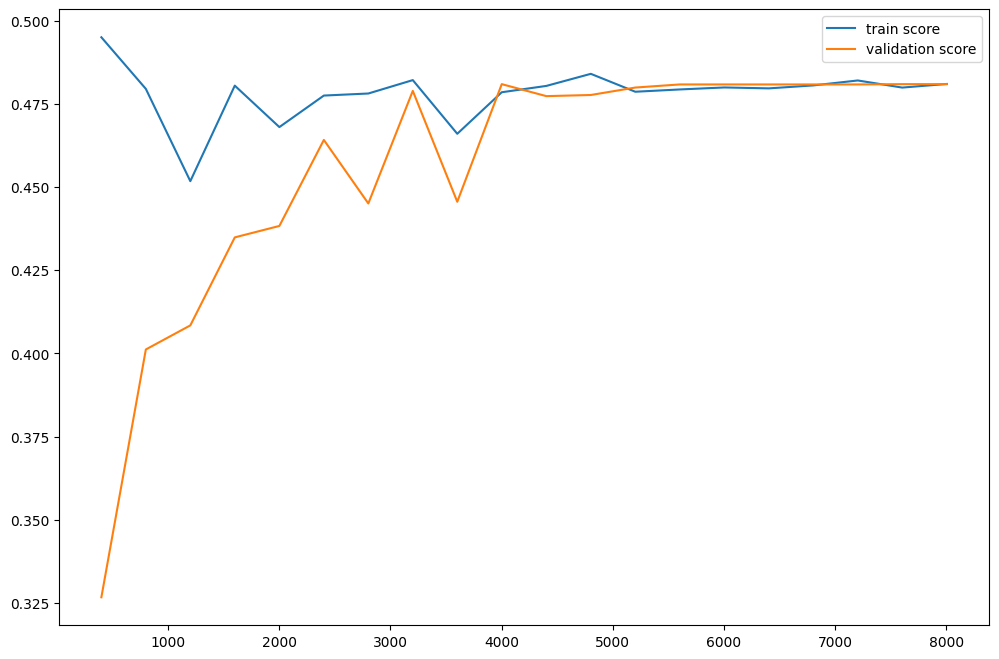

In [199]:
grid = RandomizedSearchCV(DecisionTree, param_grid, scoring='f1', cv=4,
                          n_iter=300)

grid.fit(X_train, y_train)

print(grid.best_params_)

evaluation(grid.best_estimator_)

In [200]:
base_model = grid.best_estimator_

{'memory': None, 'steps': [('selectkbest', SelectKBest(k=64)), ('decisiontreeclassifier', DecisionTreeClassifier(class_weight={0: 1, 1: 3}, criterion='entropy',
                       max_depth=10, max_leaf_nodes=10, min_samples_split=5,
                       random_state=0))], 'verbose': False, 'selectkbest': SelectKBest(k=64), 'decisiontreeclassifier': DecisionTreeClassifier(class_weight={0: 1, 1: 3}, criterion='entropy',
                       max_depth=10, max_leaf_nodes=10, min_samples_split=5,
                       random_state=0), 'selectkbest__k': 64, 'selectkbest__score_func': <function f_classif at 0x7fd5af085870>, 'decisiontreeclassifier__ccp_alpha': 0.0, 'decisiontreeclassifier__class_weight': {0: 1, 1: 3}, 'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__max_features': None, 'decisiontreeclassifier__max_leaf_nodes': 10, 'decisiontreeclassifier__min_impurity_decrease': 0.0, 'decisiontreeclassifier__min_sampl

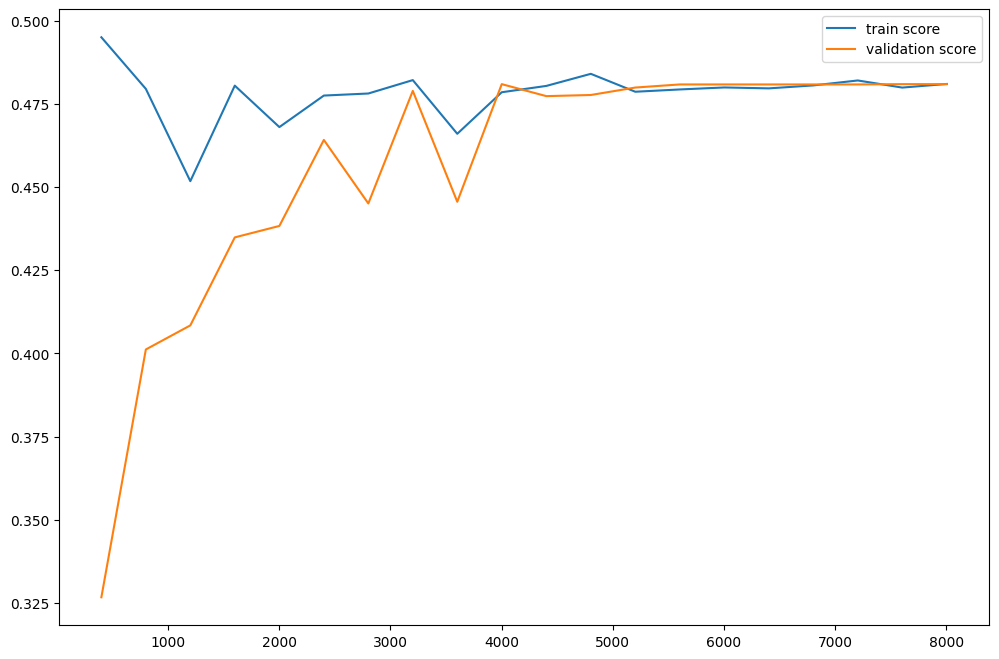

In [210]:
print(base_model.get_params())
ypredict = evaluation(base_model)

In [212]:
from sklearn import metrics
print(f"Accuracy: {metrics.accuracy_score(y_test, ypredict)}")
print(f"Precision: {metrics.precision_score(y_test, ypredict)}")
print(f"Recall: {metrics.recall_score(y_test, ypredict)}")

Accuracy: 0.7304907481898633
Precision: 0.35228539576365664
Recall: 0.7802469135802469


Accuracy: 0.7304907481898633

Precision: 0.35228539576365664

Recall: 0.7802469135802469

Looking at these results there are a few things to point out:

Note: If you are running this notebook yourself, you may get slightly different answers!

Within the test set about 15% of the rows are completed booking (`booking_complete`= 1).
Looking at the true negatives, we have 1500 out of 2081. This means that out of all the negative cases (`booking_complete` = 0), we predicted 1500 as negative. This is not great!

Looking at the false negatives, this is where we have predicted a client to not complete booking (`booking_complete`= 0) when in fact they did complete booking (`booking_complete` = 1). This number is quite low at 89, we want to get the false negatives to as close to 0 as we can, which is great!

Looking at false positives, this is where we have predicted a client to complete booking when they actually
didnt complete booking. For this value we can see there are 581 cases, which not is great!

With the true positives, we can see that in total we have 405 clients that completed booking in the test
dataset. However, we are able to correctly identify 316 of those 405, which is great!

Looking at the accuracy score, this is very misleading! Hence the use of precision and recall
is important. The accuracy score is a little high, but it does not tell us the whole story.

Looking at the recall shows us that the classifier has a ability to identify positive samples with score 0.78 which is great!

However, the precision score, this shows us a score of 0.35, but could be improveds. This would be the main concern for improving this model!

In [202]:
base_model['decisiontreeclassifier'].get_params()

{'ccp_alpha': 0.0,
 'class_weight': {0: 1, 1: 3},
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [203]:
RandomForest['randomforestclassifier'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [204]:
'''RandomForest = RandomForestClassifier(
    bootstrap=True,
    ccp_alpha=0.0,
    class_weight=None,
    criterion='gini',
    max_features='sqrt',  # You can also try 'log2' or an integer value
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=0,
)'''

"RandomForest = RandomForestClassifier(\n    bootstrap=True,\n    ccp_alpha=0.0,\n    class_weight=None,\n    criterion='gini',\n    max_features='sqrt',  # You can also try 'log2' or an integer value\n    min_samples_leaf=1,\n    min_samples_split=2,\n    random_state=0,\n)"

In [205]:
param_dist = {
    'randomforestclassifier__n_estimators': [100, 200, 400, 500],  # Number of trees in the forest
    'randomforestclassifier__max_depth': [10, 20, 30],  # Maximum depth of the tree
    'randomforestclassifier__min_samples_split': [2, 5, 10, 20],  # Minimum number of samples required to split an internal node
    'randomforestclassifier__min_samples_leaf': [1, 2, 4, 8],  # Minimum number of samples required to be at a leaf node
    'randomforestclassifier__max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
    'randomforestclassifier__criterion': ['gini', 'entropy'],
    'randomforestclassifier__class_weight':[{0: 1, 1: 3}, {0: 1, 1: 2}, {0: 1, 1: 4}],
    'selectkbest__k': range(55, 65)
}

In [206]:
# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    RandomForest,
    param_distributions=param_dist,
    scoring='f1',
    n_iter=40,  # Number of parameter settings sampled
    cv=4,  # Number of cross-validation folds
    verbose=1,  # Set verbosity level to 1
    #n_jobs=-1,   # Use all available CPU cores
    random_state=0
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)


Fitting 4 folds for each of 40 candidates, totalling 160 fits


RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('selectkbest', SelectKBest(k=75)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(n_jobs=-1,
                                                                     random_state=0))]),
                   n_iter=40,
                   param_distributions={'randomforestclassifier__class_weight': [{0: 1,
                                                                                  1: 3},
                                                                                 {0: 1,
                                                                                  1: 2},
                                                                                 {0: 1,
                                                                                  1: 4}],
                                        'randomforestclassifier__criterion': ['gini',
                                                                              'entropy'],
                                        'randomforestclassifier__max_depth': [10,
                                                                              20,
                                                                              30],
                                        'randomforestclassifier__max_features': ['sqrt',
                                                                                 'log2'],
                                        'randomforestclassifier__min_samples_leaf': [1,
                                                                                     2,
                                                                                     4,
                                                                                     8],
                                        'randomforestclassifier__min_samples_split': [2,
                                                                                      5,
                                                                                      10,
                                                                                      20],
                                        'randomforestclassifier__n_estimators': [100,
                                                                                 200,
                                                                                 400,
                                                                                 500],
                                        'selectkbest__k': range(55, 65)},
                   random_state=0, scoring='f1', verbose=1)

{'selectkbest__k': 55, 'randomforestclassifier__n_estimators': 500, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_samples_leaf': 8, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 30, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__class_weight': {0: 1, 1: 4}}
[[1633  448]
 [ 130  275]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      2081
           1       0.38      0.68      0.49       405

    accuracy                           0.77      2486
   macro avg       0.65      0.73      0.67      2486
weighted avg       0.84      0.77      0.79      2486



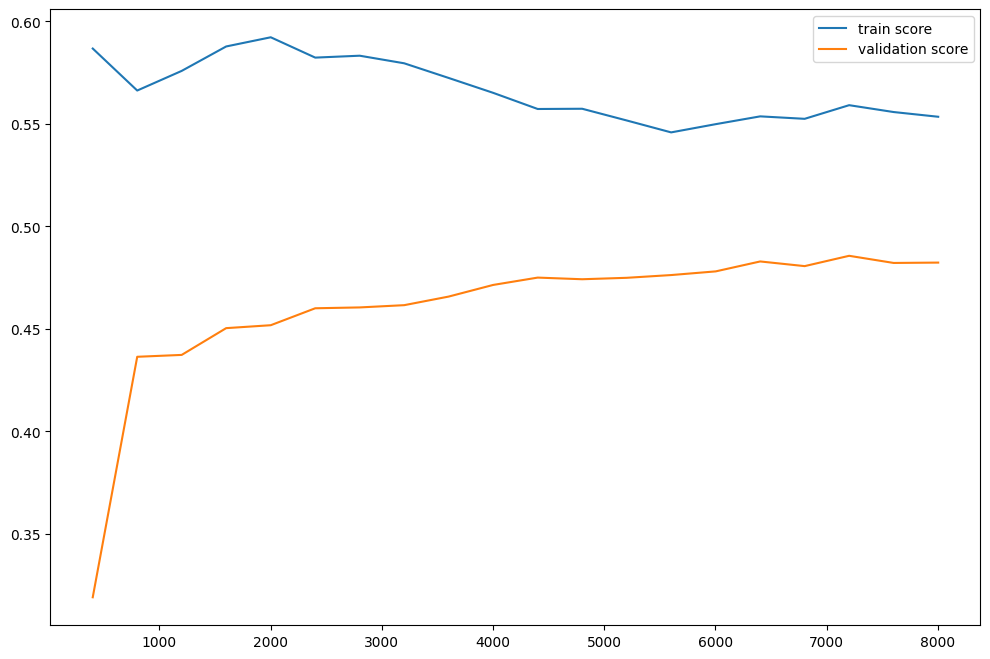

In [213]:
print(random_search.best_params_)
ypredict = evaluation(random_search.best_estimator_)

In [214]:
from sklearn import metrics
print(f"Accuracy: {metrics.accuracy_score(y_test, ypredict)}")
print(f"Precision: {metrics.precision_score(y_test, ypredict)}")
print(f"Recall: {metrics.recall_score(y_test, ypredict)}")

Accuracy: 0.7674979887369268
Precision: 0.38035961272475793
Recall: 0.6790123456790124


Accuracy: 0.7674979887369268

Precision: 0.38035961272475793

Recall: 0.6790123456790124

Looking at these results there are a few things to point out:

Note: If you are running this notebook yourself, you may get slightly different answers!

Within the test set about 15% of the rows are completed booking (`booking_complete`= 1).
Looking at the true negatives, we have 1630 out of 2081. This means that out of all the negative cases (`booking_complete` = 0), we predicted 1630 as negative (hence the name True negative). This is not great!

Looking at the false negatives, this is where we have predicted a client to not complete booking (`booking_complete`= 0) when in fact they did complete booking (`booking_complete` = 1). This number is quite high at 130, we want to get the false negatives to as close to 0 as we can, but better than the first model, which is great!

Looking at false positives, this is where we have predicted a client to complete booking when they actually
didnt complete booking. For this value we can see there are 448 cases, which not is great!

With the true positives, we can see that in total we have 405 clients that completed booking in the test
dataset. However, we are able to correctly identify 275 of those 405, which is great!

Looking at the accuracy score, this is very misleading! Hence the use of precision and recall
is important. The accuracy score is a little high, but it does not tell us the whole story.

Looking at the recall score, this shows us a score of 0.38 which is bad, but could be improved.

However, the recall shows us that the classifier has a ability to identify positive samples.

So overall, we're able to very accurately identify clients that complete booking, but we are not able to predict cases where clients do not complete booking! What we are seeing is that a high % of clients are being identified as completing the booking when they should be identified as not completing booking. This in turn tells me that the current set of features are not discriminative enough to clearly distinguish between completers and non-completers.

This point would go back to feature engineering to try and create more predictive features. They may also experiment with optimising the parameters within the model to improve performance.